# 2022 데이터사이언스 2조 팀프로젝트
---

* 주제: 공공데이터를 활용한 지하철 만족도와 외부/ 내부 요인 상관관계 분석 및 개선 방안 제시

- 서울시 지하철 이용자들이 만족도를 잘 반영할 수 있는 측정 지표들의 상관관계를 확인하여 지하철 서비스 만족도에 영향을 주는 중요한 변수와 영향력을 확인 / 지하철 이용자들이 지하철 만족도 평가 모형을 개발
- 호선 별 분석이 아닌 자치구별로 분석

* 조원 : 김민채, 윤서희, 강예환, 좌준호

## 사용데이터
---
### 서울서베이 도시정책지표조사 정보
링크 : https://data.seoul.go.kr/dataList/OA-15564/F/1/datasetView.do#

서울서베이는 2003년부터 매년 진행되는 조사이며, 가구(2만가구), 시민(5천명), 외국인(2,500명)을 조사하고 있습니다.
조사 결과는 근거기반 정책 수립을 위한 기초 자료로 활용되고 있습니다.

### 서울시 교통이용 만족도 통계
링크 : https://data.seoul.go.kr/dataList/264/S/2/datasetView.do
* 통계명 : 교통이용 만족도
* 통계종류 : 서울서베이의 서울시민 교통수단 이용 만족도를 제공하는 일반ㆍ조사통계
* 작성목적 : 도시정책지표에 대한 포괄적인 자료구축및분석을 실시함으로써 서울의 현재

6. 교통수단 이용 만족도 - 지하철/경전철
교통수단 이용 만족도_지하철/경전철 (※ 평균값 환산 기준 : 매우 만족 10점, 매우 불만족 0점)

In [1]:
import pandas as pd
import numpy as np
import folium
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc 
rc('font',family='AppleGothic')

In [2]:
survey_2021 = pd.read_excel('/Users/zoe/datascience/2021 지역사회조사_데이터.xlsx')
survey_2021

,ID,GU,FAM1,FAM15,SQ0_2,SQ0_3,TE1,BQ1_1,BQ1_2,BQ1_3,...,JEW2,JEW3,JEW4,JEW5,JEW6,JEW7,JEW8,wta2,wtb1,wtb2
0,1,110,2,2,1,1,1,7,6,7,...,6,2,6,1,110,1,3,0.906271,220.587656,1.079469
1,1,110,2,2,1,1,2,6,5,7,...,6,3,6,1,110,1,3,0.906271,179.406763,0.877946
2,2,110,1,1,1,2,1,7,6,7,...,4,3,6,2,110,1,2,0.464579,73.805978,0.361177
3,3,110,3,3,1,1,1,6,6,5,...,5,3,6,1,110,1,1,0.188537,52.521056,0.257017
4,3,110,3,3,1,1,2,7,6,7,...,5,2,6,1,110,1,4,0.188537,53.087902,0.259791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40436,78145,680,1,1,1,3,1,7,6,8,...,3,3,4,2,680,5,1,2.344021,318.292334,1.557597
40437,78147,545,1,1,1,1,1,9,9,9,...,3,2,6,2,545,4,1,0.964221,179.046954,0.876185
40438,78148,590,1,1,5,3,1,7,6,7,...,4,4,3,2,590,4,1,2.024658,329.500478,1.612445
40439,78151,620,1,1,5,2,1,3,2,5,...,3,3,3,2,620,4,4,0.430676,60.688169,0.296984


데이터를 구성하는 변수
- ID : 아이디
- GU : 구코드
- FAM1 : 전체가구원수
- FAM15 : 만15세이상 가구원수
- SQ0_2	: 주택형태
- SQ0_3	: 주거점유형태
- TE1	: 가구주와의 관계
- BQ1_1	: 최근 전반적인 삶의 만족도
- BQ1_2	: 현재 살고 있는 지역에 대한 전반적인 생활 만족도
- BQ1_3	: 전날 행복도
- BQ1_4	: 전날 걱정 정도
- AAQ1	: 월평균 가구소득
- BQ2	: 소득 만족도
- BQ3	: 생계유지 어려움 경험 정도
- BQ4_1	: 주거환경 만족도_주택
- BQ4_2	: 주거환경 만족도_기반시설
- BQ4_3	: 주거환경 만족도_주거지역 내 주차장 이용
- AQ8_1	: 교통수단 이용 만족도_버스
- AQ8_4	: 교통수단 이용 만족도_지하철
- AQ8_3	: 교통수단 이용 만족도_택시
- AQ8_2	: 교통수단 이용 만족도_시외버스/고속버스
- MTE9	: 지역거주기간_서울시
- MBQ5	: 지역거주기간_자치구
- BQ5A	: 10년 후 서울시 거주 의향
- BQ5B	: 10년 후 자치구 거주 의향
- BQ6	: 일자리 충분도
- BQ7	: 지난 1주일간 근로 여부
- BQ7A	: 일을 하지 않은 이유
- BQ7B_1 : 일자리 만족도_ 하는 일
- BQ7B_2 : 일자리 만족도_임금/가구소득
- BQ7B_3 : 일자리 만족도_근로시간
- BQ7B_4 : 일자리 만족도_근무환경
- BQ7B_5 : 일자리 만족도_전반적 만족도
- Q3BE_1~Q3BE_4 : 미취학 아동 보육시설 만족도
- BQ8A : 지역 공교육 환경 만족도
- BQ8B : 학교 교육 외 교육 기회 충분 정도
- BQ8C : 지역 내 평생교육 기회 충분 정도
- AQ11_1 : 여가활동 만족도_문화여가시설
- AQ15 : 여가활동 만족도_전반적인 여가활동
- BQ9_1 : 시간 사용에 대한 만족도_평일
- BQ9_2 : 시간 사용에 대한 만족도_주말(공휴일 포함)
- JEW1	: 성별
- JEW2	: 연령별
- JEW3	: 학력별
- JEW4	: 소득별
- JEW5	: 혼인상태별
- JEW6	: 지역소분류별
- JEW7	: 지역대분류별
- JEW8	: 직업분류별
- wta2	: 가구주 표준화 가중치
- wtb1	: 가구원 원가중치
- wtb2	: 가구원 표준화 가중치

In [3]:
#결측치 제거
survey_2021.isnull().sum()

ID            0
GU            0
FAM1          0
FAM15         0
SQ0_2         0
SQ0_3         0
TE1           0
BQ1_1         0
BQ1_2         0
BQ1_3         0
BQ1_4         0
AAQ1          0
BQ2        1301
BQ3        1301
BQ4_1         0
BQ4_2         0
BQ4_3         0
AQ8_1       713
AQ8_4      4937
AQ8_3      1800
AQ8_2       572
MTE9          0
MBQ5          0
BQ5A          0
BQ5B          0
BQ6           0
BQ7           0
BQ7A      28235
BQ7B_1    12206
BQ7B_2    12206
BQ7B_3    12206
BQ7B_4    12206
BQ7B_5    12206
Q3BE_1    39250
Q3BE_2    40267
Q3BE_3    40441
Q3BE_4    40441
BQ8A      36364
BQ8B      36364
BQ8C       3258
AQ11_1        0
AQ15          0
BQ9_1         0
BQ9_2         0
JEW1          0
JEW2          0
JEW3          0
JEW4          0
JEW5          0
JEW6          0
JEW7          0
JEW8          0
wta2          0
wtb1          0
wtb2          0
dtype: int64

In [4]:
survey_2021['AQ8_4'].value_counts()
survey_2021['AQ8_4'].median()
survey_2021['AQ8_4'] = survey_2021['AQ8_4'].fillna(survey_2021['AQ8_4'].median())

In [5]:
#필요한 데이터만 추출
new = pd.DataFrame()
new = new.append(survey_2021.groupby('GU').AQ8_4.mean())
new = new.append(survey_2021.groupby('GU').BQ1_1.mean())
new = new.append(survey_2021.groupby('GU').BQ1_2.mean())
new = new.append(survey_2021.groupby('GU').BQ1_3.mean())
new = new.append(survey_2021.groupby('GU').BQ2.mean())
new = new.append(survey_2021.groupby('GU').BQ4_2.mean())
new = new.append(survey_2021.groupby('GU').BQ5B.mean())
new = new.append(survey_2021.groupby('GU').JEW1.mean())
new = new.append(survey_2021.groupby('GU').JEW2.mean())
new = new.append(survey_2021.groupby('GU').JEW3.mean())
new = new.append(survey_2021.groupby('GU').JEW4.mean())
new = new.append(survey_2021.groupby('GU').JEW5.mean())
new = new.append(survey_2021.groupby('GU').JEW8.mean())
new = new.T
new

,AQ8_4,BQ1_1,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B,JEW1,JEW2,JEW3,JEW4,JEW5,JEW8
110,3.651099,6.612637,6.724359,6.586081,3.505243,3.586996,3.583333,1.533883,4.074176,2.814103,5.193223,1.489011,2.571429
140,3.767591,6.713220,6.638593,6.534115,3.592552,3.719616,3.513859,1.546908,4.270789,2.562900,4.632196,1.579957,2.703625
170,3.727273,6.289185,6.458464,6.224138,3.544201,3.566614,3.645768,1.538401,4.153605,2.708464,5.013323,1.554859,2.660658
200,3.719632,6.721602,6.726198,6.205515,3.637908,3.726855,3.527905,1.529219,4.040709,2.705844,5.179908,1.500328,2.666448
215,3.716779,6.379866,6.477181,6.285235,3.466073,3.562416,3.523490,1.520805,4.048322,2.734228,4.840268,1.571812,2.556376
230,3.713656,6.525488,6.424166,6.385777,3.552461,3.552549,3.390183,1.505979,4.059157,2.616111,4.889239,1.500944,2.779736
260,3.675770,6.481697,6.411970,6.454968,3.472106,3.575247,3.256246,1.518303,4.024985,2.624637,4.875073,1.493318,2.712958
290,3.642974,6.338436,6.344451,6.263532,3.554679,3.606342,3.366867,1.549481,4.180973,2.626025,4.902132,1.491525,2.669765
305,3.691710,7.073834,7.072539,6.933290,3.647258,3.768135,3.501943,1.521373,4.148964,2.565415,4.904145,1.461788,2.702720
320,3.734780,6.216235,6.303709,6.204339,3.547857,3.568929,3.412176,1.521344,4.461162,2.412176,4.441568,1.643807,2.912526


In [6]:
new['region'] = new.index
new

,AQ8_4,BQ1_1,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B,JEW1,JEW2,JEW3,JEW4,JEW5,JEW8,region
110,3.651099,6.612637,6.724359,6.586081,3.505243,3.586996,3.583333,1.533883,4.074176,2.814103,5.193223,1.489011,2.571429,110
140,3.767591,6.713220,6.638593,6.534115,3.592552,3.719616,3.513859,1.546908,4.270789,2.562900,4.632196,1.579957,2.703625,140
170,3.727273,6.289185,6.458464,6.224138,3.544201,3.566614,3.645768,1.538401,4.153605,2.708464,5.013323,1.554859,2.660658,170
200,3.719632,6.721602,6.726198,6.205515,3.637908,3.726855,3.527905,1.529219,4.040709,2.705844,5.179908,1.500328,2.666448,200
215,3.716779,6.379866,6.477181,6.285235,3.466073,3.562416,3.523490,1.520805,4.048322,2.734228,4.840268,1.571812,2.556376,215
230,3.713656,6.525488,6.424166,6.385777,3.552461,3.552549,3.390183,1.505979,4.059157,2.616111,4.889239,1.500944,2.779736,230
260,3.675770,6.481697,6.411970,6.454968,3.472106,3.575247,3.256246,1.518303,4.024985,2.624637,4.875073,1.493318,2.712958,260
290,3.642974,6.338436,6.344451,6.263532,3.554679,3.606342,3.366867,1.549481,4.180973,2.626025,4.902132,1.491525,2.669765,290
305,3.691710,7.073834,7.072539,6.933290,3.647258,3.768135,3.501943,1.521373,4.148964,2.565415,4.904145,1.461788,2.702720,305
320,3.734780,6.216235,6.303709,6.204339,3.547857,3.568929,3.412176,1.521344,4.461162,2.412176,4.441568,1.643807,2.912526,320


In [7]:
a ={'110':'종로구'
,'140':'중구'
,'170':'용산구'
,'200':'성동구'
,'215':'광진구'
,'230':'동대문구'
,'260':'중랑구'
,'290':'성북구'
,'305':'강북구'
,'320':'도봉구'
,'350':'노원구'
,'380':'은평구'
,'410':'서대문구'
,'440':'마포구'
,'470':'양천구'
,'500':'강서구'
,'530':'구로구'
,'545':'금천구'
,'560':'영등포구'
,'590':'동작구'
,'620':'관악구'
,'650':'서초구'
,'680':'강남구'
,'710':'송파구'
,'740':'강동구'
,'0':'Null'}

In [8]:
new['region'] = new['region'].apply(lambda k: a[str(k)])

In [9]:
new

,AQ8_4,BQ1_1,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B,JEW1,JEW2,JEW3,JEW4,JEW5,JEW8,region
110,3.651099,6.612637,6.724359,6.586081,3.505243,3.586996,3.583333,1.533883,4.074176,2.814103,5.193223,1.489011,2.571429,종로구
140,3.767591,6.713220,6.638593,6.534115,3.592552,3.719616,3.513859,1.546908,4.270789,2.562900,4.632196,1.579957,2.703625,중구
170,3.727273,6.289185,6.458464,6.224138,3.544201,3.566614,3.645768,1.538401,4.153605,2.708464,5.013323,1.554859,2.660658,용산구
200,3.719632,6.721602,6.726198,6.205515,3.637908,3.726855,3.527905,1.529219,4.040709,2.705844,5.179908,1.500328,2.666448,성동구
215,3.716779,6.379866,6.477181,6.285235,3.466073,3.562416,3.523490,1.520805,4.048322,2.734228,4.840268,1.571812,2.556376,광진구
230,3.713656,6.525488,6.424166,6.385777,3.552461,3.552549,3.390183,1.505979,4.059157,2.616111,4.889239,1.500944,2.779736,동대문구
260,3.675770,6.481697,6.411970,6.454968,3.472106,3.575247,3.256246,1.518303,4.024985,2.624637,4.875073,1.493318,2.712958,중랑구
290,3.642974,6.338436,6.344451,6.263532,3.554679,3.606342,3.366867,1.549481,4.180973,2.626025,4.902132,1.491525,2.669765,성북구
305,3.691710,7.073834,7.072539,6.933290,3.647258,3.768135,3.501943,1.521373,4.148964,2.565415,4.904145,1.461788,2.702720,강북구
320,3.734780,6.216235,6.303709,6.204339,3.547857,3.568929,3.412176,1.521344,4.461162,2.412176,4.441568,1.643807,2.912526,도봉구


In [10]:
metro_satisfaction_corr = new.corr(method = 'pearson')
metro_satisfaction_corr

,AQ8_4,BQ1_1,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B,JEW1,JEW2,JEW3,JEW4,JEW5,JEW8
AQ8_4,1.000000,0.289152,0.390202,0.301808,0.468930,0.473113,0.334944,0.058747,-0.197076,0.225776,0.236832,0.099212,-0.236537
BQ1_1,0.289152,1.000000,0.888017,0.800994,0.489959,0.752976,0.330812,-0.024007,-0.365379,0.367299,0.481355,-0.467898,-0.350771
BQ1_2,0.390202,0.888017,1.000000,0.738881,0.509700,0.745465,0.598274,-0.020680,-0.472031,0.632192,0.732126,-0.547246,-0.560730
BQ1_3,0.301808,0.800994,0.738881,1.000000,0.314217,0.527922,0.105651,-0.055874,-0.434975,0.376270,0.376984,-0.427738,-0.425810
BQ2,0.468930,0.489959,0.509700,0.314217,1.000000,0.585361,0.427589,-0.109632,-0.144470,0.183321,0.302535,-0.101624,-0.155946
BQ4_2,0.473113,0.752976,0.745465,0.527922,0.585361,1.000000,0.470631,0.230426,-0.235984,0.264385,0.380771,-0.248853,-0.234402
BQ5B,0.334944,0.330812,0.598274,0.105651,0.427589,0.470631,1.000000,0.141054,-0.116193,0.506035,0.521680,-0.081847,-0.358180
JEW1,0.058747,-0.024007,-0.020680,-0.055874,-0.109632,0.230426,0.141054,1.000000,0.073866,0.051375,-0.083818,0.259021,-0.005175
JEW2,-0.197076,-0.365379,-0.472031,-0.434975,-0.144470,-0.235984,-0.116193,0.073866,1.000000,-0.813529,-0.635404,0.558708,0.730910
JEW3,0.225776,0.367299,0.632192,0.376270,0.183321,0.264385,0.506035,0.051375,-0.813529,1.000000,0.846153,-0.517819,-0.853744


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

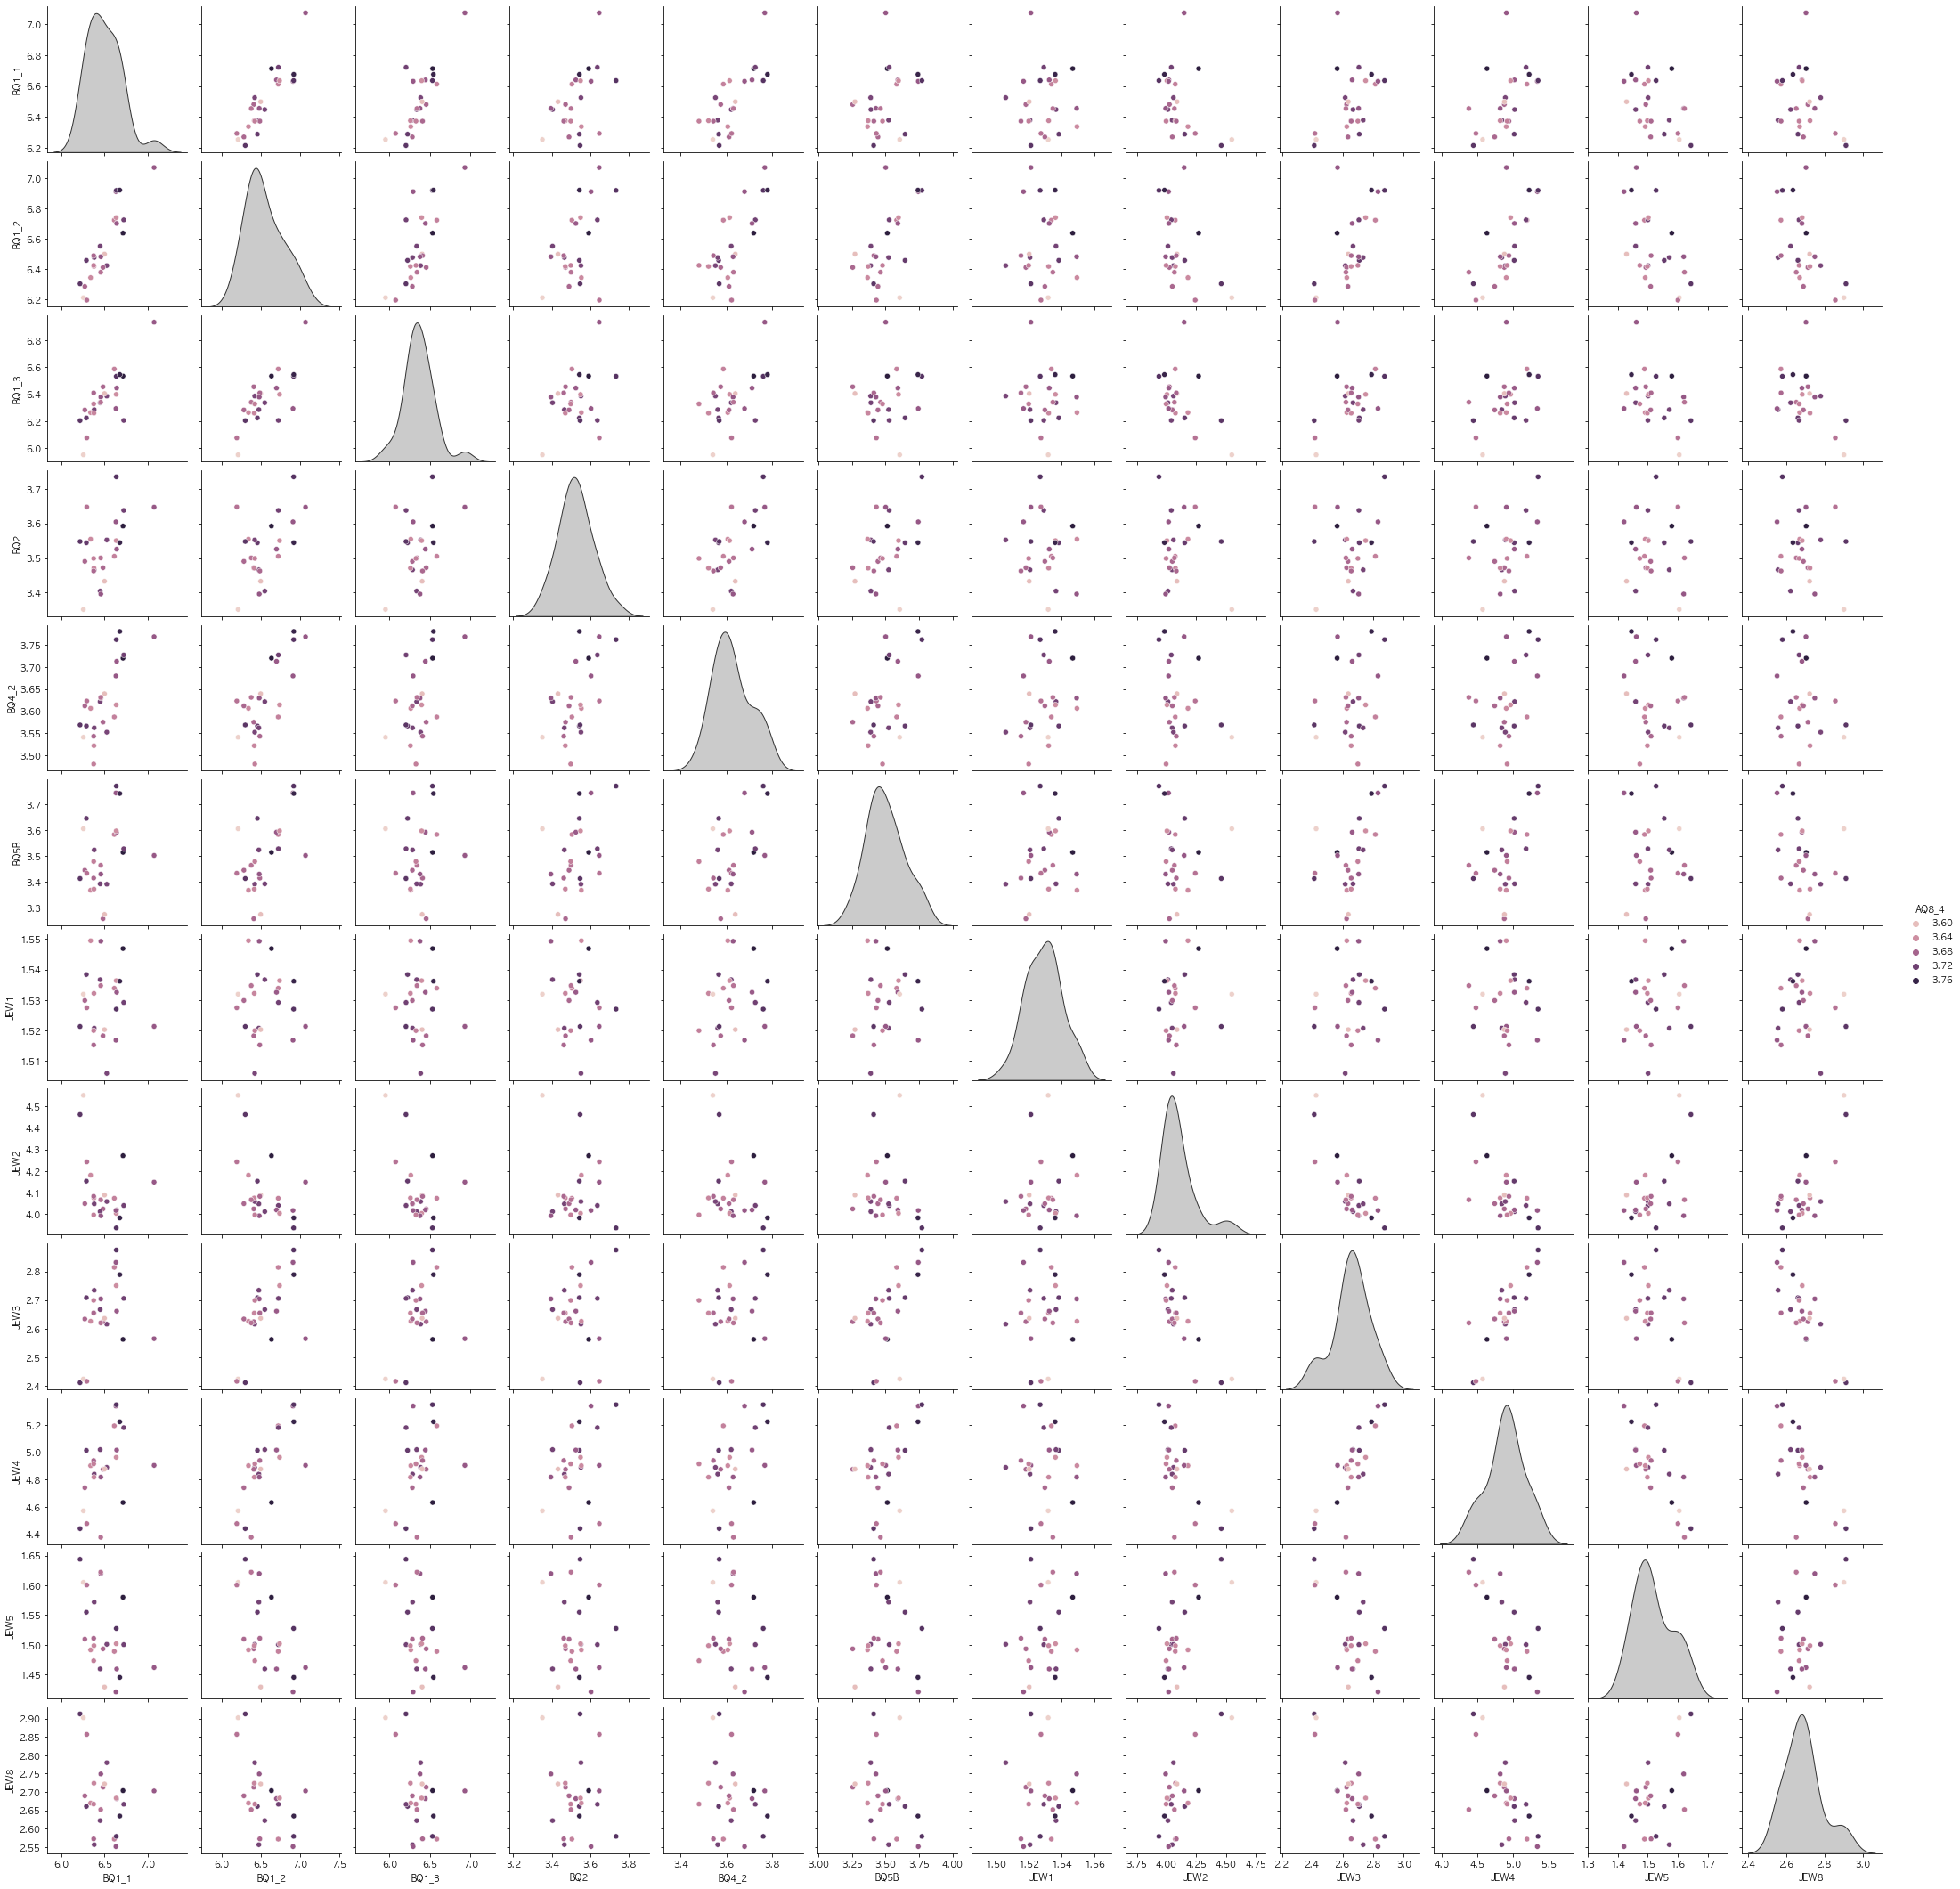

In [12]:
sns.pairplot(new, hue = 'AQ8_4', diag_kws={"hue": None, "color": ".2"})
plt.show()

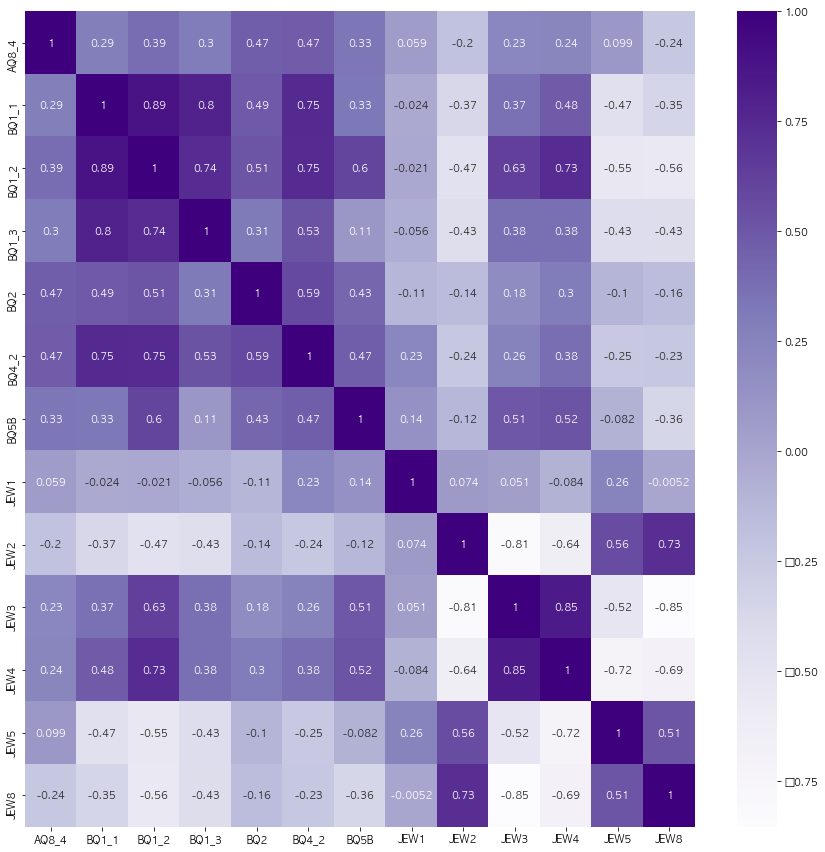

In [13]:
plt.figure(figsize = (15,15))
sns.heatmap(data = new.corr(),annot=True, cmap = 'Purples')
plt.show()

### 지하철 외부 요인

- BQ1_2 현재 살고 있는 지역에 대한 전반적인 생활 만족도 : 0.390202
- BQ1_3 전날 행복도 : 0.301808
- BQ2 소득 만족도 : 0.468930
- BQ4_2 주거환경 만족도_기반시설 : 0.473113
- BQ5B 10년 후 자치구 거주 의향 : 0.334944

- 개인별보다는 지역별 영향을 크게 받고 있음을 확인
- 현재 살고 있는 지역에 대한 전반적인 생활 만족도에 따른 차이가 존재함을 알 수 있다
- 생각보다 성별, 연령별, 학력별, 소득별, 혼인상태별 유의미한 상관관계가 없는 것을 확인


Text(0.5, 1.0, '지하철 만족도와 성별')

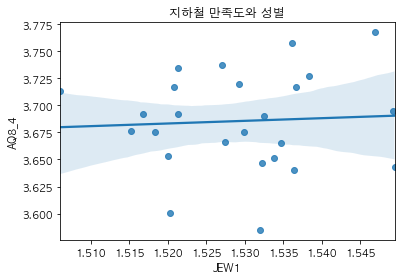

In [14]:
ax = plt.subplots()
ax = sns.regplot(x='JEW1', y='AQ8_4', data = new)
ax.set_title('지하철 만족도와 성별')

Text(0.5, 1.0, '지하철 만족도와 연령')

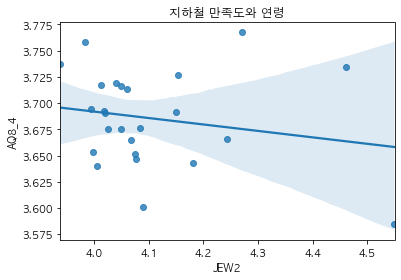

In [15]:
ax = plt.subplots()
ax = sns.regplot(x='JEW2', y='AQ8_4', data = new)
ax.set_title('지하철 만족도와 연령')

Text(0.5, 1.0, '지하철 만족도와 학력')

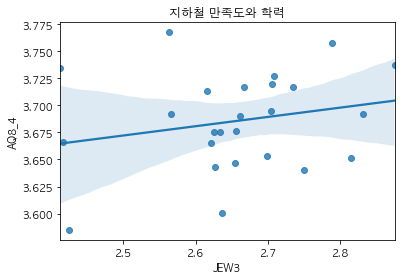

In [16]:
ax = plt.subplots()
ax = sns.regplot(x='JEW3', y='AQ8_4', data = new)
ax.set_title('지하철 만족도와 학력')

In [17]:
#필요한 데이터만 추출
del new['JEW1']
del new['JEW2']
del new['JEW3']
del new['JEW4']
del new['JEW5']
del new['JEW8']
del new['BQ1_1']

new

,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B,region
110,3.651099,6.724359,6.586081,3.505243,3.586996,3.583333,종로구
140,3.767591,6.638593,6.534115,3.592552,3.719616,3.513859,중구
170,3.727273,6.458464,6.224138,3.544201,3.566614,3.645768,용산구
200,3.719632,6.726198,6.205515,3.637908,3.726855,3.527905,성동구
215,3.716779,6.477181,6.285235,3.466073,3.562416,3.523490,광진구
230,3.713656,6.424166,6.385777,3.552461,3.552549,3.390183,동대문구
260,3.675770,6.411970,6.454968,3.472106,3.575247,3.256246,중랑구
290,3.642974,6.344451,6.263532,3.554679,3.606342,3.366867,성북구
305,3.691710,7.072539,6.933290,3.647258,3.768135,3.501943,강북구
320,3.734780,6.303709,6.204339,3.547857,3.568929,3.412176,도봉구


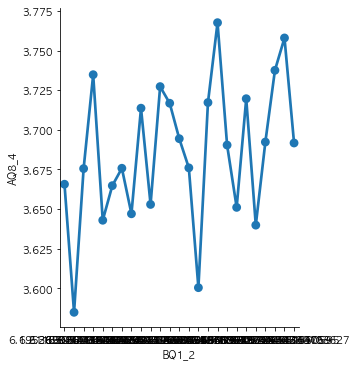

In [18]:
# 만족도(AQ8_4)와 상관관계가 큰 BQ1_2 (현재 살고 있는 지역에 대한 전반적인 생활 만족도) 변수 확인
sns.catplot(x = 'BQ1_2', y = 'AQ8_4', data = new, kind = 'point')
plt.show()

Text(0.5, 1.0, '지하철 만족도와 현재 살고 있는 지역에 대한 전반적인 생활 만족도')

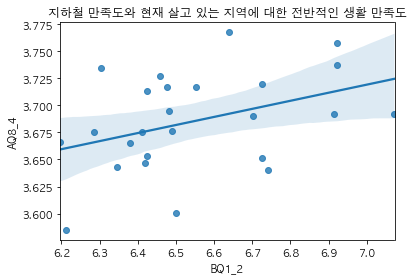

In [19]:
ax = plt.subplots()
ax = sns.regplot(x='BQ1_2', y='AQ8_4', data = new)
ax.set_title('지하철 만족도와 현재 살고 있는 지역에 대한 전반적인 생활 만족도')

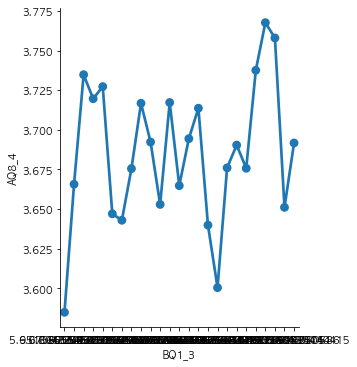

In [20]:
# 만족도(AQ8_4)와 상관관계가 큰 BQ1_3 (전날 행복도) 변수 확인
sns.catplot(x = 'BQ1_3', y = 'AQ8_4', data = new, kind = 'point')
plt.show()

Text(0.5, 1.0, '지하철 만족도와 전날 행복도')

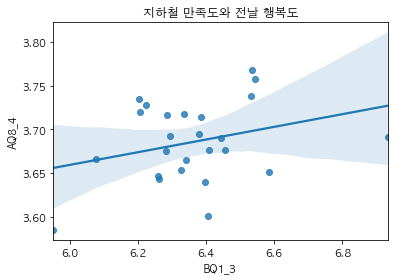

In [21]:
ax = plt.subplots()
ax = sns.regplot(x='BQ1_3', y='AQ8_4', data = new)
ax.set_title('지하철 만족도와 전날 행복도')

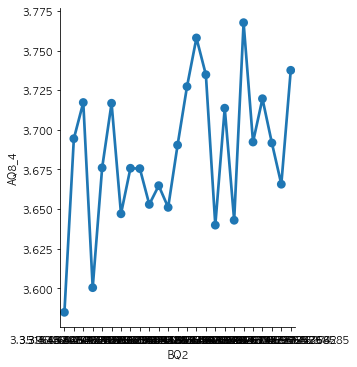

In [22]:
# 만족도(AQ8_4)와 상관관계가 큰 BQ2 (소득 만족도) 변수 확인
sns.catplot(x = 'BQ2', y = 'AQ8_4', data = new, kind = 'point')
plt.show()

Text(0.5, 1.0, '지하철 만족도와 소득 만족도')

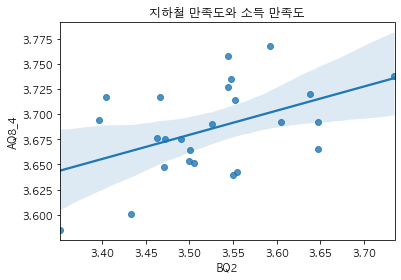

In [23]:
ax = plt.subplots()
ax = sns.regplot(x='BQ2', y='AQ8_4', data = new)
ax.set_title('지하철 만족도와 소득 만족도')

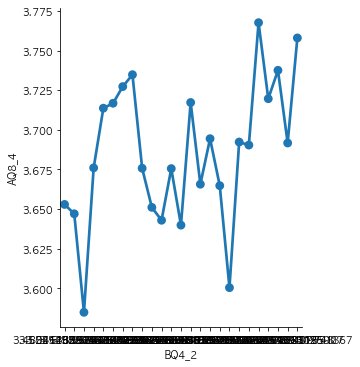

In [24]:
# 만족도(AQ8_4)와 상관관계가 큰 BQ4_2 주거환경 만족도_기반시설) 확인
sns.catplot(x = 'BQ4_2', y = 'AQ8_4', data = new, kind = 'point')
plt.show()

Text(0.5, 1.0, '지하철 만족도와 주거환경 만족도_기반시설')

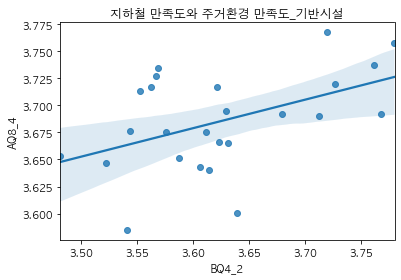

In [25]:
ax = plt.subplots()
ax = sns.regplot(x='BQ4_2', y='AQ8_4', data = new)
ax.set_title('지하철 만족도와 주거환경 만족도_기반시설')

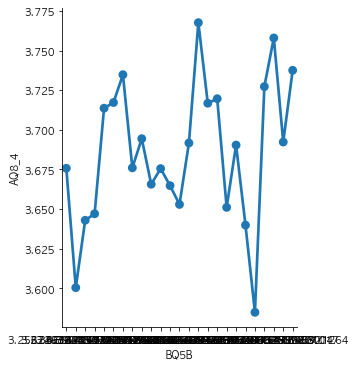

In [26]:
# 만족도(AQ8_4)와 상관관계가 큰 BQ5B 10년 후 자치구 거주 의향 확인
sns.catplot(x = 'BQ5B', y = 'AQ8_4', data = new, kind = 'point')
plt.show()

Text(0.5, 1.0, '지하철 만족도와 10년 후 자치구 거주 의향')

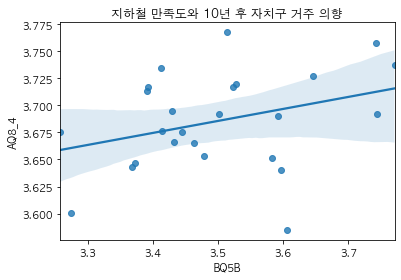

In [27]:
ax = plt.subplots()
ax = sns.regplot(x='BQ5B', y='AQ8_4', data = new)
ax.set_title('지하철 만족도와 10년 후 자치구 거주 의향')

# 새로운 변수 추가
## 지하철 내부 요인 변수 수집

# 1. 자치구별 지하철 혼잡도 데이터
# 사용데이터
---
## 서울시 행정동별 지하철 총 승차 승객수 정보
링크 : https://data.seoul.go.kr/dataList/OA-21224/S/1/datasetView.do
서울시 1일 1시간 단위로, 행정동별 지하철 총 승차 승객수를 확인할 수 있습니다.
행정동에 대한 ID 값 정보는 연관데이터인 서울시 읍면동마스터 정보를 참고하시기 바랍니다.

## 서울시 읍면동마스터 정보
링크 : https://data.seoul.go.kr/dataList/OA-21234/S/1/datasetView.do
서울시 읍면동 마스터 정보입니다.
서울시 읍면동에 대한 읍면동 ID, 읍면동명, 자치구명, 시도명을 확인할 수 있습니다.

In [28]:
import pandas as pd
import numpy as np
data = pd.read_csv('/Users/zoe/datascience/서울시 행정동별 지하철 총 승차 승객수 정보.csv', 
                   index_col=0, engine = 'python', encoding='cp949')
data

,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,지하철_승객_수_07시,지하철_승객_수_08시,...,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시
행정동_ID,,,,,,,,,,,,,,,,,,,,,
1112065,16015.0,0.0,0.0,0.0,0.0,1.0,326.0,727.0,2192.0,2966.0,...,739.0,760.0,839.0,850.0,773.0,426.0,361.0,299.0,203.0,29.0
1111077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103052,4805.0,0.0,0.0,0.0,0.0,0.0,30.0,69.0,114.0,201.0,...,270.0,336.0,451.0,520.0,606.0,345.0,290.0,561.0,134.0,23.0
1125070,8300.0,0.0,0.0,0.0,0.0,0.0,109.0,296.0,870.0,948.0,...,492.0,559.0,684.0,631.0,581.0,332.0,286.0,297.0,129.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105057,10728.0,1.0,0.0,0.0,0.0,0.0,182.0,467.0,1321.0,2028.0,...,432.0,394.0,562.0,662.0,762.0,422.0,281.0,300.0,150.0,30.0
1101061,95603.0,4.0,0.0,0.0,0.0,18.0,279.0,355.0,726.0,1180.0,...,4781.0,6015.0,7236.0,12936.0,19579.0,8734.0,6512.0,7032.0,5214.0,1713.0
1114066,101870.0,11.0,0.0,0.0,0.0,20.0,934.0,2075.0,6074.0,8147.0,...,3973.0,4469.0,5575.0,8175.0,13185.0,8303.0,6423.0,7907.0,7051.0,2576.0


In [29]:
id = pd.read_csv('/Users/zoe/datascience/서울시 읍면동마스터 정보.csv', 
                   index_col=0, engine = 'python', encoding='cp949')
id.head()

,행정동_명칭,자치구_명칭,시도_명칭
행정동_ID,,,
3138041,개군면,양평군,경기도
3138040,용문면,양평군,경기도
3138039,지평면,양평군,경기도
3138038,양동면,양평군,경기도
3138037,청운면,양평군,경기도


In [30]:
#두 데이터 병합
congestion_merge = pd.merge(data, id, how = 'inner', left_index = True, right_index = True)
congestion_merge.head()

,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,지하철_승객_수_07시,지하철_승객_수_08시,...,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시,행정동_명칭,자치구_명칭,시도_명칭
행정동_ID,,,,,,,,,,,,,,,,,,,,,
1101053,41189.0,0.0,0.0,0.0,0.0,3.0,94.0,249.0,676.0,977.0,...,5335.0,6389.0,2644.0,2356.0,2417.0,736.0,143.0,사직동,종로구,서울
1101053,48169.0,0.0,0.0,0.0,0.0,2.0,96.0,284.0,766.0,1172.0,...,5815.0,10603.0,3875.0,3519.0,4786.0,1152.0,179.0,사직동,종로구,서울
1101053,50003.0,1.0,0.0,0.0,0.0,2.0,121.0,307.0,833.0,1330.0,...,5948.0,12426.0,4383.0,3330.0,3346.0,2798.0,629.0,사직동,종로구,서울
1101054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,삼청동,종로구,서울
1101054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,삼청동,종로구,서울


In [31]:
congestion_merge['자치구_명칭'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [32]:
congestion_merge['시도_명칭'].unique()

array(['서울'], dtype=object)

In [33]:
# 결측치 제거
congestion_merge.isnull().sum()

지하철_승객_수        615
지하철_승객_수_00시    615
지하철_승객_수_01시    615
지하철_승객_수_02시    615
지하철_승객_수_03시    615
지하철_승객_수_04시    615
지하철_승객_수_05시    615
지하철_승객_수_06시    615
지하철_승객_수_07시    615
지하철_승객_수_08시    615
지하철_승객_수_09시    615
지하철_승객_수_10시    615
지하철_승객_수_11시    615
지하철_승객_수_12시    615
지하철_승객_수_13시    615
지하철_승객_수_14시    615
지하철_승객_수_15시    615
지하철_승객_수_16시    615
지하철_승객_수_17시    615
지하철_승객_수_18시    615
지하철_승객_수_19시    615
지하철_승객_수_20시    615
지하철_승객_수_21시    615
지하철_승객_수_22시    615
지하철_승객_수_23시    615
행정동_명칭            0
자치구_명칭            0
시도_명칭             0
dtype: int64

In [34]:
#delete row with missing values
congestion = congestion_merge.dropna(axis=0)

congestion

,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,지하철_승객_수_07시,지하철_승객_수_08시,...,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시,행정동_명칭,자치구_명칭,시도_명칭
행정동_ID,,,,,,,,,,,,,,,,,,,,,
1101053,41189.0,0.0,0.0,0.0,0.0,3.0,94.0,249.0,676.0,977.0,...,5335.0,6389.0,2644.0,2356.0,2417.0,736.0,143.0,사직동,종로구,서울
1101053,48169.0,0.0,0.0,0.0,0.0,2.0,96.0,284.0,766.0,1172.0,...,5815.0,10603.0,3875.0,3519.0,4786.0,1152.0,179.0,사직동,종로구,서울
1101053,50003.0,1.0,0.0,0.0,0.0,2.0,121.0,307.0,833.0,1330.0,...,5948.0,12426.0,4383.0,3330.0,3346.0,2798.0,629.0,사직동,종로구,서울
1101061,86667.0,10.0,0.0,0.0,0.0,8.0,198.0,345.0,619.0,964.0,...,11372.0,12086.0,6453.0,6188.0,6542.0,1565.0,332.0,종로1234가동,종로구,서울
1101061,94757.0,1.0,0.0,0.0,0.0,9.0,247.0,366.0,656.0,1042.0,...,11743.0,16643.0,8152.0,8298.0,9891.0,2159.0,411.0,종로1234가동,종로구,서울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125071,9734.0,0.0,0.0,0.0,0.0,0.0,103.0,443.0,1509.0,1367.0,...,686.0,457.0,139.0,104.0,91.0,94.0,13.0,둔촌2동,강동구,서울
1125071,10611.0,0.0,0.0,0.0,0.0,0.0,95.0,460.0,1757.0,1697.0,...,707.0,430.0,196.0,112.0,72.0,73.0,16.0,둔촌2동,강동구,서울
1125074,7596.0,0.0,0.0,0.0,0.0,0.0,138.0,261.0,684.0,885.0,...,569.0,612.0,345.0,239.0,245.0,106.0,18.0,길동,강동구,서울


In [35]:
congestion_result = congestion[['지하철_승객_수', '자치구_명칭']]
congestion_result

,지하철_승객_수,자치구_명칭
행정동_ID,,
1101053,41189.0,종로구
1101053,48169.0,종로구
1101053,50003.0,종로구
1101061,86667.0,종로구
1101061,94757.0,종로구
...,...,...
1125071,9734.0,강동구
1125071,10611.0,강동구
1125074,7596.0,강동구


In [36]:
congestion_result = congestion_result.groupby('자치구_명칭').sum()
congestion_result

,지하철_승객_수
자치구_명칭,
강남구,1371948.0
강동구,430401.0
강북구,262409.0
강서구,595817.0
관악구,705446.0
광진구,537355.0
구로구,526795.0
금천구,195129.0
노원구,497633.0


In [37]:
congestion_result['region'] = congestion_result.index
congestion_result

,지하철_승객_수,region
자치구_명칭,,
강남구,1371948.0,강남구
강동구,430401.0,강동구
강북구,262409.0,강북구
강서구,595817.0,강서구
관악구,705446.0,관악구
광진구,537355.0,광진구
구로구,526795.0,구로구
금천구,195129.0,금천구
노원구,497633.0,노원구


In [38]:
new

,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B,region
110,3.651099,6.724359,6.586081,3.505243,3.586996,3.583333,종로구
140,3.767591,6.638593,6.534115,3.592552,3.719616,3.513859,중구
170,3.727273,6.458464,6.224138,3.544201,3.566614,3.645768,용산구
200,3.719632,6.726198,6.205515,3.637908,3.726855,3.527905,성동구
215,3.716779,6.477181,6.285235,3.466073,3.562416,3.523490,광진구
230,3.713656,6.424166,6.385777,3.552461,3.552549,3.390183,동대문구
260,3.675770,6.411970,6.454968,3.472106,3.575247,3.256246,중랑구
290,3.642974,6.344451,6.263532,3.554679,3.606342,3.366867,성북구
305,3.691710,7.072539,6.933290,3.647258,3.768135,3.501943,강북구
320,3.734780,6.303709,6.204339,3.547857,3.568929,3.412176,도봉구


In [39]:
new1 = pd.merge(congestion_result, new, how='right')
new1

,지하철_승객_수,region,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B
0,707734.0,종로구,3.651099,6.724359,6.586081,3.505243,3.586996,3.583333
1,1016743.0,중구,3.767591,6.638593,6.534115,3.592552,3.719616,3.513859
2,308992.0,용산구,3.727273,6.458464,6.224138,3.544201,3.566614,3.645768
3,548709.0,성동구,3.719632,6.726198,6.205515,3.637908,3.726855,3.527905
4,537355.0,광진구,3.716779,6.477181,6.285235,3.466073,3.562416,3.523490
5,281879.0,동대문구,3.713656,6.424166,6.385777,3.552461,3.552549,3.390183
6,278576.0,중랑구,3.675770,6.411970,6.454968,3.472106,3.575247,3.256246
7,357209.0,성북구,3.642974,6.344451,6.263532,3.554679,3.606342,3.366867
8,262409.0,강북구,3.691710,7.072539,6.933290,3.647258,3.768135,3.501943
9,229945.0,도봉구,3.734780,6.303709,6.204339,3.547857,3.568929,3.412176


In [40]:
metro_satisfaction_corr_1 = new1.corr(method = 'pearson')
metro_satisfaction_corr_1

,지하철_승객_수,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B
지하철_승객_수,1.000000,0.318675,0.544552,0.304825,0.349303,0.450093,0.558080
AQ8_4,0.318675,1.000000,0.390202,0.301808,0.468930,0.473113,0.334944
BQ1_2,0.544552,0.390202,1.000000,0.738881,0.509700,0.745465,0.598274
BQ1_3,0.304825,0.301808,0.738881,1.000000,0.314217,0.527922,0.105651
BQ2,0.349303,0.468930,0.509700,0.314217,1.000000,0.585361,0.427589
BQ4_2,0.450093,0.473113,0.745465,0.527922,0.585361,1.000000,0.470631
BQ5B,0.558080,0.334944,0.598274,0.105651,0.427589,0.470631,1.000000


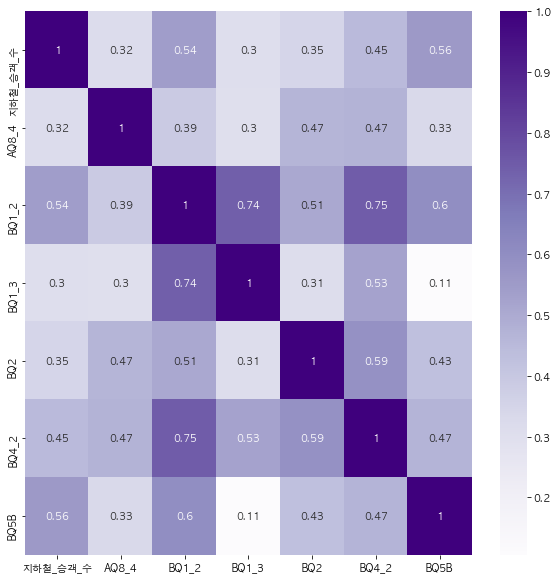

In [41]:
plt.figure(figsize = (10,10))
sns.heatmap(data = new1.corr(),annot=True, cmap = 'Purples')
plt.show()

- 지하철 승객수 : 0.318675

Text(0.5, 1.0, '지하철 만족도와 지하철 혼잡도')

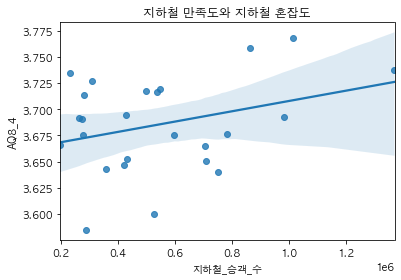

In [42]:
ax = plt.subplots()
ax = sns.regplot(x='지하철_승객_수', y='AQ8_4', data = new1)
ax.set_title('지하철 만족도와 지하철 혼잡도')

# 2. 자치구별 무임승차

# 사용데이터
---
## 서울서베이 도시정책지표조사 정보
링크 : https://data.seoul.go.kr/dataList/OA-15564/F/1/datasetView.do
2018~2021년도 '서울서베이 가구원(원시자료와 부호화 지침서)' 활용

## 서울시 지하철 호선별 역별 유/무임 승하차 인원 정보
링크 : https://data.seoul.go.kr/dataList/OA-12251/F/1/datasetView.do
201801~202112 무임승차인원/무임하차인원 정보 활용

In [43]:
free_ride = pd.read_excel('/Users/zoe/datascience/시군구별 무임승차 무임하차 수.xlsx')
free_ride

,region,무임승차,무임하차
0,구로구,73482,73189
1,강남구,53020,51275
2,강북구,54924,55224
3,동대문구,79376,80213
4,도봉구,70356,70263
5,노원구,67102,66122
6,성북구,41328,40818
7,중랑구,43624,43874
8,은평구,56322,56253
9,종로구,111773,109322


In [44]:
new2 = pd.merge(free_ride, new1, how='right')
new2

,region,무임승차,무임하차,지하철_승객_수,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B
0,종로구,111773,109322,707734.0,3.651099,6.724359,6.586081,3.505243,3.586996,3.583333
1,중구,44991,44196,1016743.0,3.767591,6.638593,6.534115,3.592552,3.719616,3.513859
2,용산구,28055,27710,308992.0,3.727273,6.458464,6.224138,3.544201,3.566614,3.645768
3,성동구,35110,34967,548709.0,3.719632,6.726198,6.205515,3.637908,3.726855,3.527905
4,광진구,50200,50146,537355.0,3.716779,6.477181,6.285235,3.466073,3.562416,3.523490
5,동대문구,79376,80213,281879.0,3.713656,6.424166,6.385777,3.552461,3.552549,3.390183
6,중랑구,43624,43874,278576.0,3.675770,6.411970,6.454968,3.472106,3.575247,3.256246
7,성북구,41328,40818,357209.0,3.642974,6.344451,6.263532,3.554679,3.606342,3.366867
8,강북구,54924,55224,262409.0,3.691710,7.072539,6.933290,3.647258,3.768135,3.501943
9,도봉구,70356,70263,229945.0,3.734780,6.303709,6.204339,3.547857,3.568929,3.412176


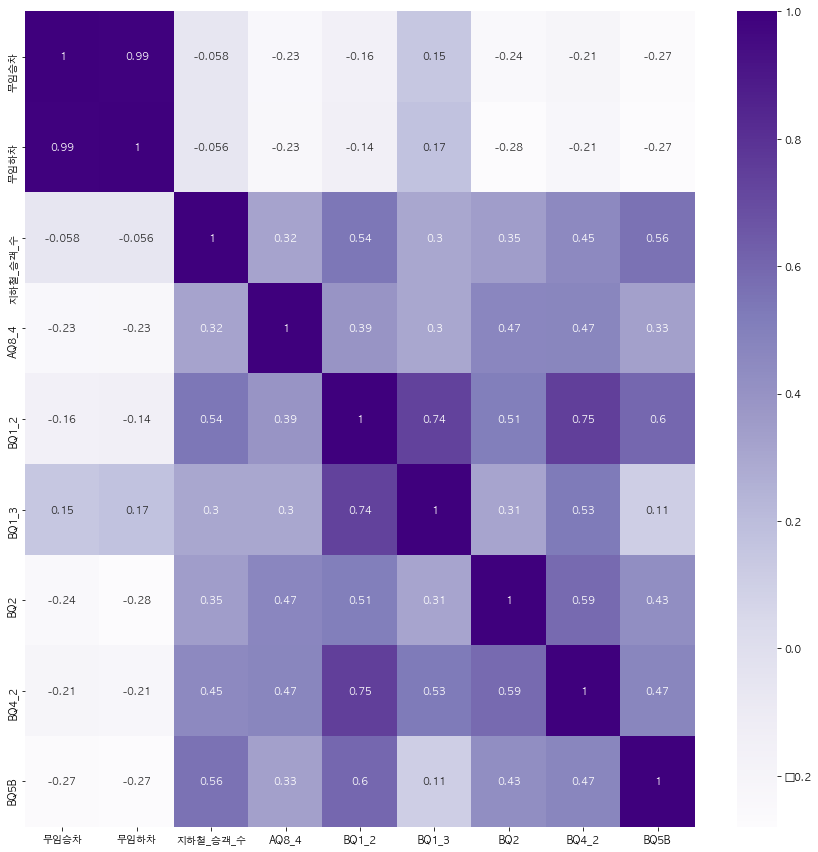

In [45]:
plt.figure(figsize = (15,15))
sns.heatmap(data = new2.corr(),annot=True, cmap = 'Purples')
plt.show()

In [46]:
metro_satisfaction_corr_2 = new2.corr(method = 'pearson')
metro_satisfaction_corr_2

,무임승차,무임하차,지하철_승객_수,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B
무임승차,1.000000,0.994812,-0.058391,-0.234775,-0.159445,0.148676,-0.244715,-0.208571,-0.266296
무임하차,0.994812,1.000000,-0.056181,-0.227619,-0.141866,0.172643,-0.279909,-0.214924,-0.271417
지하철_승객_수,-0.058391,-0.056181,1.000000,0.318675,0.544552,0.304825,0.349303,0.450093,0.558080
AQ8_4,-0.234775,-0.227619,0.318675,1.000000,0.390202,0.301808,0.468930,0.473113,0.334944
BQ1_2,-0.159445,-0.141866,0.544552,0.390202,1.000000,0.738881,0.509700,0.745465,0.598274
BQ1_3,0.148676,0.172643,0.304825,0.301808,0.738881,1.000000,0.314217,0.527922,0.105651
BQ2,-0.244715,-0.279909,0.349303,0.468930,0.509700,0.314217,1.000000,0.585361,0.427589
BQ4_2,-0.208571,-0.214924,0.450093,0.473113,0.745465,0.527922,0.585361,1.000000,0.470631
BQ5B,-0.266296,-0.271417,0.558080,0.334944,0.598274,0.105651,0.427589,0.470631,1.000000


In [47]:
#필요한 데이터만 추출
del new2['무임승차']
del new2['무임하차']
new2

,region,지하철_승객_수,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B
0,종로구,707734.0,3.651099,6.724359,6.586081,3.505243,3.586996,3.583333
1,중구,1016743.0,3.767591,6.638593,6.534115,3.592552,3.719616,3.513859
2,용산구,308992.0,3.727273,6.458464,6.224138,3.544201,3.566614,3.645768
3,성동구,548709.0,3.719632,6.726198,6.205515,3.637908,3.726855,3.527905
4,광진구,537355.0,3.716779,6.477181,6.285235,3.466073,3.562416,3.523490
5,동대문구,281879.0,3.713656,6.424166,6.385777,3.552461,3.552549,3.390183
6,중랑구,278576.0,3.675770,6.411970,6.454968,3.472106,3.575247,3.256246
7,성북구,357209.0,3.642974,6.344451,6.263532,3.554679,3.606342,3.366867
8,강북구,262409.0,3.691710,7.072539,6.933290,3.647258,3.768135,3.501943
9,도봉구,229945.0,3.734780,6.303709,6.204339,3.547857,3.568929,3.412176


# 3. 자치구별 지하철 사고 발생 빈도

# 사용데이터
---

## 한국교통안전공단_국내 철도사고, 운행장애 발생 정보
(국내에서 발생한 철도사고, 운행장애 마이크로데이터 입니다. "철도사고·장애, 철도차량고장 등에 따른 의무보고 및 철도안전 자율보고에 관한 지침"(국토교통부 고시)에 의해 국가로 보고된 통계입니다.)

- 2021: https://www.data.go.kr/data/15079935/fileData.do
- 2020: https://www.data.go.kr/data/15079935/fileData.do#layer_data_infomation




In [48]:
accident = pd.read_excel('/Users/zoe/datascience/지하철사고.xls')
accident

,region,합계지연열차수,합계최대지연시간_분
0,강남구,29,37
1,강동구,0,0
2,강북구,31,15
3,강서구,0,0
4,관악구,0,0
5,광진구,0,0
6,구로구,15,79
7,금천구,8,37
8,노원구,2,43
9,도봉구,1,7


In [49]:
new3 = pd.merge(accident, new2, how='right')
new3

,region,합계지연열차수,합계최대지연시간_분,지하철_승객_수,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B
0,종로구,0,0,707734.0,3.651099,6.724359,6.586081,3.505243,3.586996,3.583333
1,중구,80,914,1016743.0,3.767591,6.638593,6.534115,3.592552,3.719616,3.513859
2,용산구,38,362,308992.0,3.727273,6.458464,6.224138,3.544201,3.566614,3.645768
3,성동구,6,41,548709.0,3.719632,6.726198,6.205515,3.637908,3.726855,3.527905
4,광진구,0,0,537355.0,3.716779,6.477181,6.285235,3.466073,3.562416,3.523490
5,동대문구,12,50,281879.0,3.713656,6.424166,6.385777,3.552461,3.552549,3.390183
6,중랑구,0,0,278576.0,3.675770,6.411970,6.454968,3.472106,3.575247,3.256246
7,성북구,0,0,357209.0,3.642974,6.344451,6.263532,3.554679,3.606342,3.366867
8,강북구,31,15,262409.0,3.691710,7.072539,6.933290,3.647258,3.768135,3.501943
9,도봉구,1,7,229945.0,3.734780,6.303709,6.204339,3.547857,3.568929,3.412176


In [50]:
metro_satisfaction_corr_3 = new3.corr(method = 'pearson')
metro_satisfaction_corr_3

,합계지연열차수,합계최대지연시간_분,지하철_승객_수,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B
합계지연열차수,1.000000,0.499465,0.261382,0.109401,0.033933,0.166494,-0.004324,-0.077433,-0.074781
합계최대지연시간_분,0.499465,1.000000,0.289028,0.396300,0.025389,0.128985,0.131874,0.115270,0.023315
지하철_승객_수,0.261382,0.289028,1.000000,0.318675,0.544552,0.304825,0.349303,0.450093,0.558080
AQ8_4,0.109401,0.396300,0.318675,1.000000,0.390202,0.301808,0.468930,0.473113,0.334944
BQ1_2,0.033933,0.025389,0.544552,0.390202,1.000000,0.738881,0.509700,0.745465,0.598274
BQ1_3,0.166494,0.128985,0.304825,0.301808,0.738881,1.000000,0.314217,0.527922,0.105651
BQ2,-0.004324,0.131874,0.349303,0.468930,0.509700,0.314217,1.000000,0.585361,0.427589
BQ4_2,-0.077433,0.115270,0.450093,0.473113,0.745465,0.527922,0.585361,1.000000,0.470631
BQ5B,-0.074781,0.023315,0.558080,0.334944,0.598274,0.105651,0.427589,0.470631,1.000000


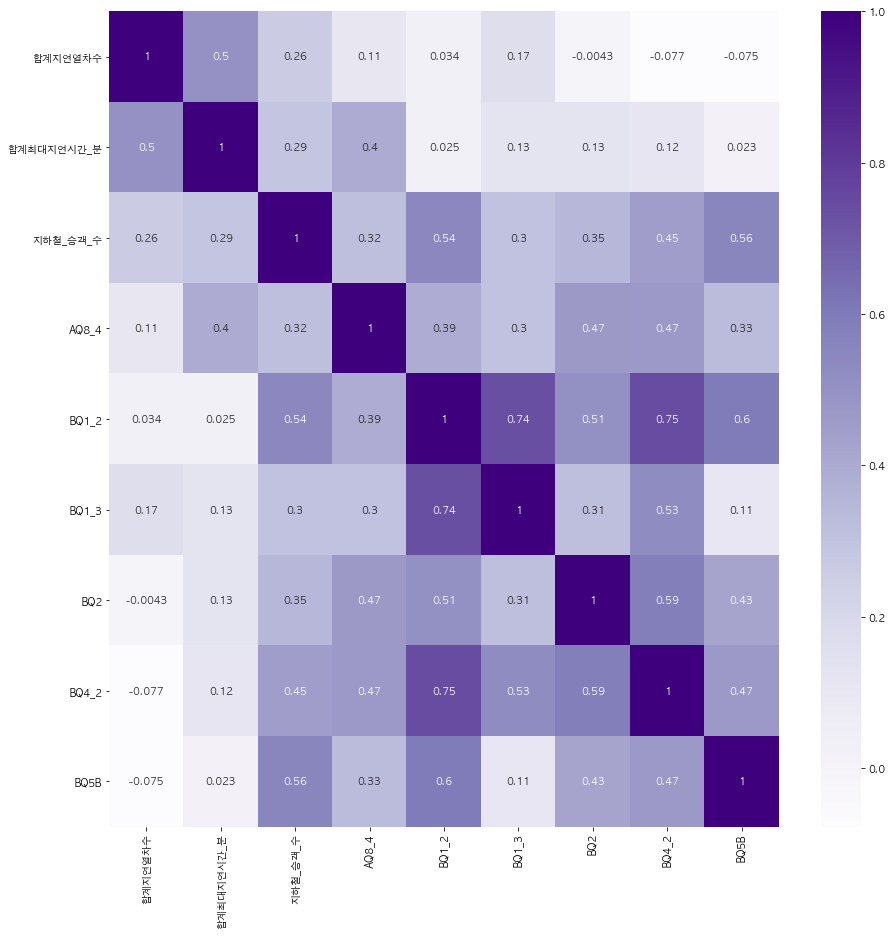

In [51]:
plt.figure(figsize = (15,15))
sns.heatmap(data = new3.corr(),annot=True, cmap = 'Purples')
plt.show()

- 합계최대지연시간(분) : 0.396300

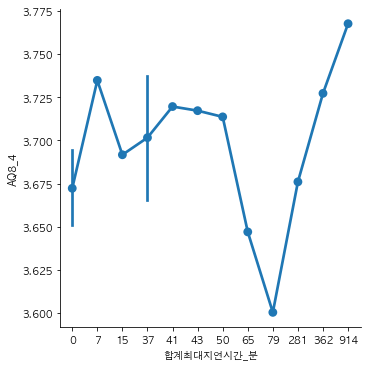

In [52]:
# 만족도(AQ8_4)와 상관관계가 큰 합계최대지연시간(분)확인
sns.catplot(x = '합계최대지연시간_분', y = 'AQ8_4', data = new3, kind = 'point')
plt.show()

Text(0.5, 1.0, '지하철 만족도와 합계최대지연시간(분)')

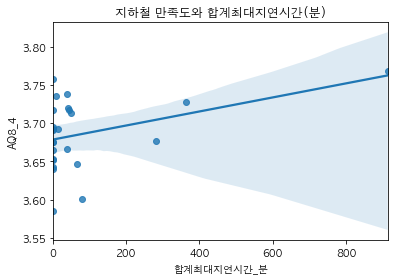

In [53]:
ax = plt.subplots()
ax = sns.regplot(x='합계최대지연시간_분', y='AQ8_4', data = new3)
ax.set_title('지하철 만족도와 합계최대지연시간(분)')

In [54]:
#필요한 데이터만 추출
del new3['합계지연열차수']
new3

,region,합계최대지연시간_분,지하철_승객_수,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B
0,종로구,0,707734.0,3.651099,6.724359,6.586081,3.505243,3.586996,3.583333
1,중구,914,1016743.0,3.767591,6.638593,6.534115,3.592552,3.719616,3.513859
2,용산구,362,308992.0,3.727273,6.458464,6.224138,3.544201,3.566614,3.645768
3,성동구,41,548709.0,3.719632,6.726198,6.205515,3.637908,3.726855,3.527905
4,광진구,0,537355.0,3.716779,6.477181,6.285235,3.466073,3.562416,3.523490
5,동대문구,50,281879.0,3.713656,6.424166,6.385777,3.552461,3.552549,3.390183
6,중랑구,0,278576.0,3.675770,6.411970,6.454968,3.472106,3.575247,3.256246
7,성북구,0,357209.0,3.642974,6.344451,6.263532,3.554679,3.606342,3.366867
8,강북구,15,262409.0,3.691710,7.072539,6.933290,3.647258,3.768135,3.501943
9,도봉구,7,229945.0,3.734780,6.303709,6.204339,3.547857,3.568929,3.412176


# 4. 자치구별 지하철 정보

# 사용데이터
---
### 1. 국가철도공단_화장실
(역사별 화장실에 대한 데이터로, 철도운영기관명, 선명, 역명, 화장실의 역층, 게이트내외, 출구번호, 상세위치, 남녀구분, 데이터가 있습니다.)

1호선:https://www.data.go.kr/data/15041254/fileData.do
2호선:https://www.data.go.kr/data/15041255/fileData.do?recommendDataYn=Y
3호선:https://www.data.go.kr/data/15041256/fileData.do
4호선:https://www.data.go.kr/data/15041257/fileData.do
5호선:https://www.data.go.kr/data/15041258/fileData.do
6호선:https://www.data.go.kr/data/15041259/fileData.do
7호선:https://www.data.go.kr/data/15041260/fileData.do?recommendDataYn=Y
8호선:https://www.data.go.kr/data/15041261/fileData.do?recommendDataYn=Y
9호선:https://www.data.go.kr/data/15041262/fileData.do
수인분당선:https://www.data.go.kr/data/15041250/fileData.do
경춘선:https://www.data.go.kr/data/15041251/fileData.do
경의중앙선:https://www.data.go.kr/data/15041253/fileData.do


### 2. 서울교통공사_역사심도정보
링크 : https://www.data.go.kr/data/15071319/fileData.do
(서울교통공사의 역사 심도(선로기준, 승강장기준) 데이터입니다. 해당 데이터는 호선,정거장명,정거장층수,형식,ⓐ지반고(해발고도+100.3m),ⓑ레일면고(해발고도+100.3m),정거장 깊이[선로기준](ⓐ-ⓑ)(m),정거장 깊이[승강장기준](ⓐ-ⓑ-1.1)(m),비고 데이터로 이루어져 있습니다.)


### 3. 서울교통공사_역사면적정보
링크 : https://www.data.go.kr/data/15060120/fileData.do
서울교통공사의 역사면적정보(호선, 역명, 대합실 면적, 승강장 면적) 데이터입니다.


In [55]:
subway_info = pd.read_excel('/Users/zoe/datascience/지하철추가정보.xls')
subway_info

,region,지반고,레일면고,선로기준 정거장 깊이(m),승강장기준 정거장 깊이(m),대합실,승강장,총화장실수,게이트외,게이트내,게이트외부화장실비율
0,강남구,125.939,107.752,18.187,17.087,6613.813,2490.248,17,14,3,82.353
1,강동구,121.687,103.519,18.168,17.068,5426.788,2122.813,17,16,1,94.118
2,강북구,136.745,123.640,13.105,12.005,3826.500,2218.500,1,1,0,100.000
3,강서구,114.388,97.417,16.971,15.871,4465.551,2246.183,19,18,1,94.737
4,관악구,133.050,119.870,13.180,12.080,4027.500,1861.000,5,4,1,80.000
5,광진구,118.305,112.345,5.960,4.860,4739.852,2224.582,11,8,3,72.727
6,구로구,116.925,104.323,12.602,11.502,5754.747,2764.523,14,5,9,35.714
7,금천구,109.590,81.820,27.770,26.670,10116.830,2434.700,3,3,0,100.000
8,노원구,124.766,112.188,12.578,11.478,6947.807,2484.462,18,13,5,72.222
9,도봉구,130.597,130.823,-0.227,-1.327,4253.760,2134.900,8,4,4,50.000


In [56]:
new4 = pd.merge(subway_info, new3, how='right')
new4

,region,지반고,레일면고,선로기준 정거장 깊이(m),승강장기준 정거장 깊이(m),대합실,승강장,총화장실수,게이트외,게이트내,게이트외부화장실비율,합계최대지연시간_분,지하철_승객_수,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B
0,종로구,127.157,108.056,19.101,18.001,6641.351,2410.375,23,10,13,43.478,0,707734.0,3.651099,6.724359,6.586081,3.505243,3.586996,3.583333
1,중구,131.646,111.319,20.327,19.227,6060.141,2522.445,23,13,10,56.522,914,1016743.0,3.767591,6.638593,6.534115,3.592552,3.719616,3.513859
2,용산구,124.806,103.583,21.222,20.122,5182.809,2238.712,13,6,7,46.154,362,308992.0,3.727273,6.458464,6.224138,3.544201,3.566614,3.645768
3,성동구,121.482,112.166,9.316,8.216,4940.639,2169.369,15,11,4,73.333,41,548709.0,3.719632,6.726198,6.205515,3.637908,3.726855,3.527905
4,광진구,118.305,112.345,5.960,4.860,4739.852,2224.582,11,8,3,72.727,0,537355.0,3.716779,6.477181,6.285235,3.466073,3.562416,3.523490
5,동대문구,115.688,102.917,12.772,11.672,4453.938,2340.083,11,5,6,45.455,50,281879.0,3.713656,6.424166,6.385777,3.552461,3.552549,3.390183
6,중랑구,124.481,105.023,19.459,18.359,5246.666,1901.064,8,7,1,87.500,0,278576.0,3.675770,6.411970,6.454968,3.472106,3.575247,3.256246
7,성북구,128.721,110.100,18.621,17.521,4876.312,2089.401,9,7,2,77.778,0,357209.0,3.642974,6.344451,6.263532,3.554679,3.606342,3.366867
8,강북구,136.745,123.640,13.105,12.005,3826.500,2218.500,1,1,0,100.000,15,262409.0,3.691710,7.072539,6.933290,3.647258,3.768135,3.501943
9,도봉구,130.597,130.823,-0.227,-1.327,4253.760,2134.900,8,4,4,50.000,7,229945.0,3.734780,6.303709,6.204339,3.547857,3.568929,3.412176


In [57]:
metro_satisfaction_corr_4 = new4.corr(method = 'pearson')
metro_satisfaction_corr_4

,지반고,레일면고,선로기준 정거장 깊이(m),승강장기준 정거장 깊이(m),대합실,승강장,총화장실수,게이트외,게이트내,게이트외부화장실비율,합계최대지연시간_분,지하철_승객_수,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B
지반고,1.000000,0.850707,-0.149416,-0.149413,-0.398367,-0.463824,-0.240455,-0.251903,-0.092959,0.032396,0.093667,-0.012699,0.285260,0.408653,0.481003,0.257739,0.409866,0.141385
레일면고,0.850707,1.000000,-0.646849,-0.646847,-0.573719,-0.384359,-0.236568,-0.264869,-0.058860,-0.124822,-0.057018,-0.087286,0.363307,0.316664,0.384827,0.127061,0.327198,0.013231
선로기준 정거장 깊이(m),-0.149416,-0.646849,1.000000,1.000000,0.501241,0.050070,0.096139,0.132768,-0.024157,0.281812,0.243137,0.145767,-0.269551,-0.002777,-0.026015,0.134920,-0.020835,0.180215
승강장기준 정거장 깊이(m),-0.149413,-0.646847,1.000000,1.000000,0.501227,0.050063,0.096136,0.132765,-0.024159,0.281811,0.243135,0.145763,-0.269556,-0.002781,-0.026018,0.134914,-0.020844,0.180207
대합실,-0.398367,-0.573719,0.501241,0.501227,1.000000,0.556619,0.263945,0.213274,0.223035,0.082528,0.108528,0.219116,0.018985,0.015134,-0.137392,0.121822,0.128690,0.177387
승강장,-0.463824,-0.384359,0.050070,0.050063,0.556619,1.000000,0.465788,0.278162,0.581493,-0.342499,0.288404,0.386302,0.072164,0.195655,0.156188,-0.020463,0.143147,0.029268
총화장실수,-0.240455,-0.236568,0.096139,0.096136,0.263945,0.465788,1.000000,0.915646,0.639092,-0.177243,0.240902,0.618191,0.357431,0.359355,0.224833,-0.055854,0.211095,0.356186
게이트외,-0.251903,-0.264869,0.132768,0.132765,0.213274,0.278162,0.915646,1.000000,0.276002,0.192528,0.060191,0.576482,0.323648,0.330896,0.170068,-0.001320,0.230912,0.379515
게이트내,-0.092959,-0.058860,-0.024157,-0.024159,0.223035,0.581493,0.639092,0.276002,1.000000,-0.792160,0.460837,0.375110,0.235381,0.226113,0.212185,-0.131023,0.062923,0.125513
게이트외부화장실비율,0.032396,-0.124822,0.281812,0.281811,0.082528,-0.342499,-0.177243,0.192528,-0.792160,1.000000,-0.328322,-0.029947,-0.065699,0.097131,0.104284,0.257473,0.199087,0.073563


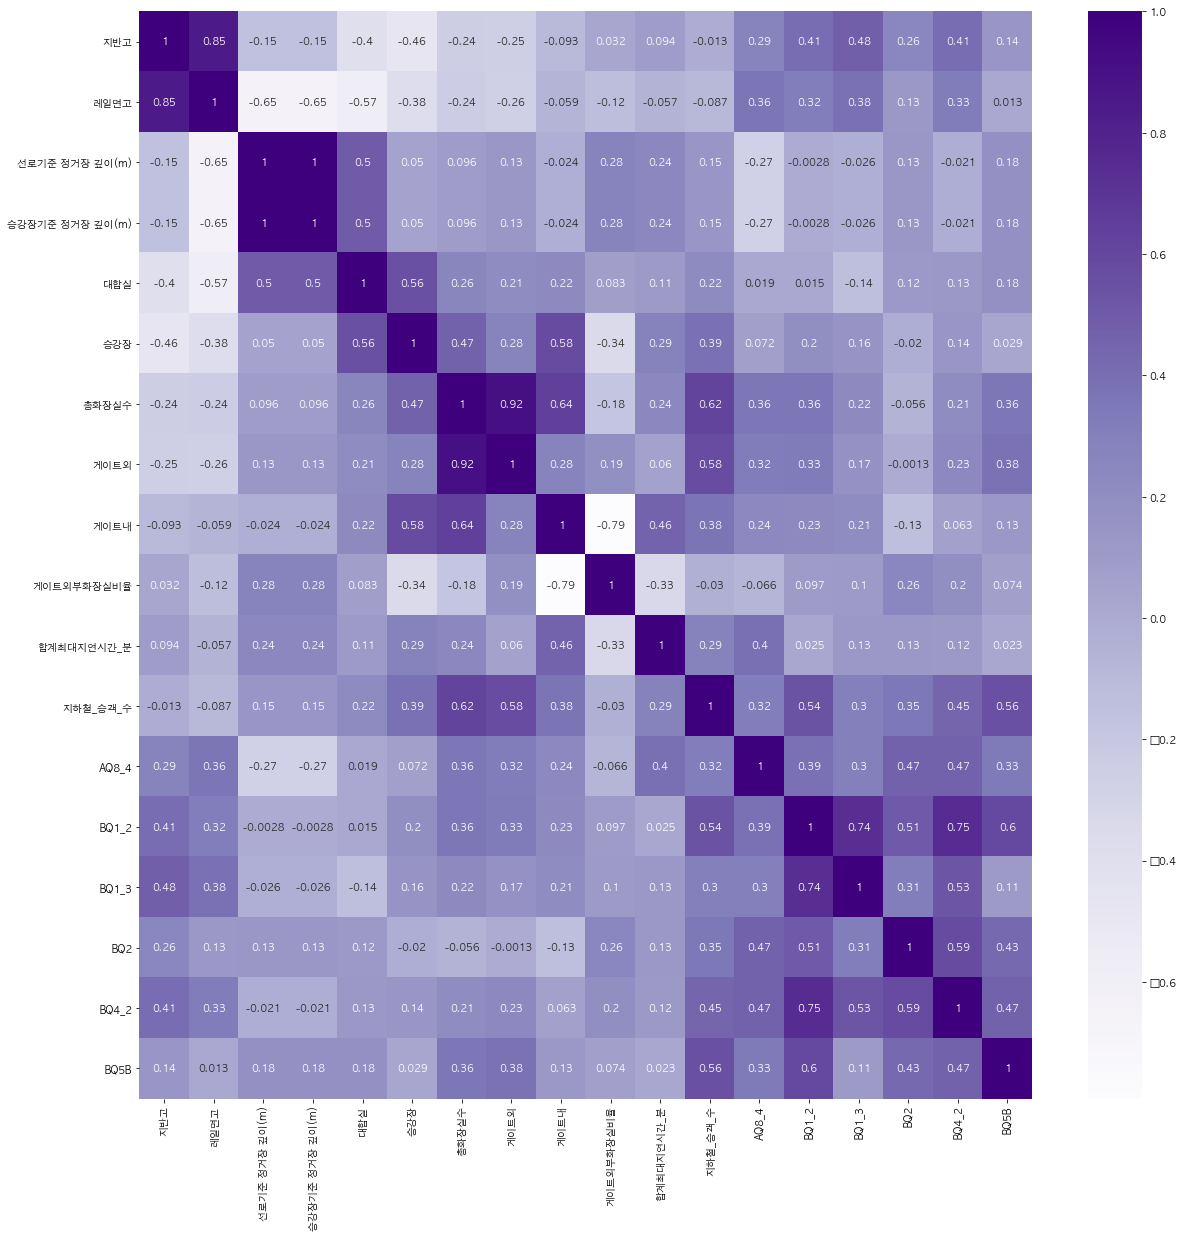

In [58]:
plt.figure(figsize = (20,20))
sns.heatmap(data = new4.corr(),annot=True, cmap = 'Purples')
plt.show()

- 총 화장실 수 : 0.357431	

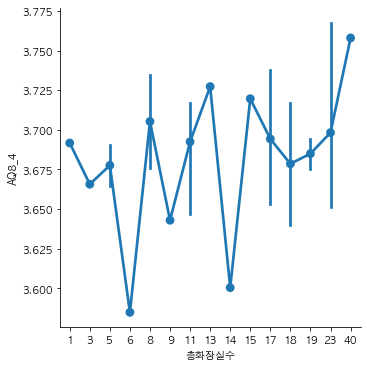

In [59]:
# 만족도(AQ8_4)와 상관관계가 큰 총화장실수 확인
sns.catplot(x = '총화장실수', y = 'AQ8_4', data = new4, kind = 'point')
plt.show()

Text(0.5, 1.0, '지하철 만족도와 화장실')

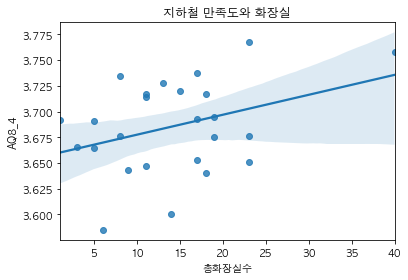

In [60]:
ax = plt.subplots()
ax = sns.regplot(x='총화장실수', y='AQ8_4', data = new4)
ax.set_title('지하철 만족도와 화장실')

In [61]:
#필요한 데이터만 추출
del new4['지반고']
del new4['레일면고']
del new4['선로기준 정거장 깊이(m)']
del new4['승강장기준 정거장 깊이(m)']
del new4['대합실']
del new4['승강장']
del new4['게이트외']
del new4['게이트내']
del new4['게이트외부화장실비율']
del new4['region']

new4

,총화장실수,합계최대지연시간_분,지하철_승객_수,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B
0,23,0,707734.0,3.651099,6.724359,6.586081,3.505243,3.586996,3.583333
1,23,914,1016743.0,3.767591,6.638593,6.534115,3.592552,3.719616,3.513859
2,13,362,308992.0,3.727273,6.458464,6.224138,3.544201,3.566614,3.645768
3,15,41,548709.0,3.719632,6.726198,6.205515,3.637908,3.726855,3.527905
4,11,0,537355.0,3.716779,6.477181,6.285235,3.466073,3.562416,3.523490
5,11,50,281879.0,3.713656,6.424166,6.385777,3.552461,3.552549,3.390183
6,8,0,278576.0,3.675770,6.411970,6.454968,3.472106,3.575247,3.256246
7,9,0,357209.0,3.642974,6.344451,6.263532,3.554679,3.606342,3.366867
8,1,15,262409.0,3.691710,7.072539,6.933290,3.647258,3.768135,3.501943
9,8,7,229945.0,3.734780,6.303709,6.204339,3.547857,3.568929,3.412176


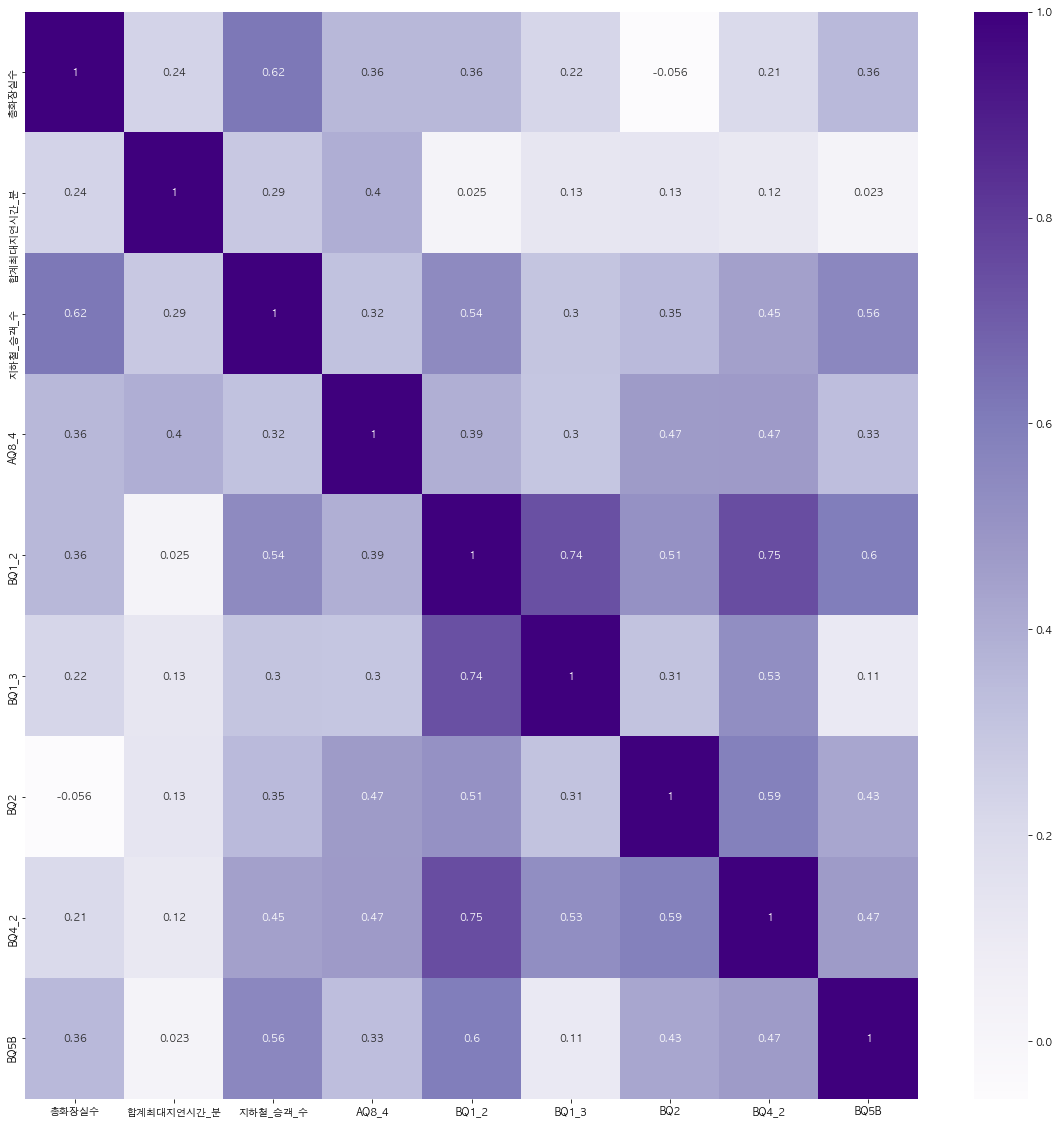

In [62]:
plt.figure(figsize = (20,20))
sns.heatmap(data = new4.corr(),annot=True, cmap = 'Purples')
plt.show()

In [63]:
metro_satisfaction_corr_5 = new4.corr(method = 'pearson')
metro_satisfaction_corr_5

,총화장실수,합계최대지연시간_분,지하철_승객_수,AQ8_4,BQ1_2,BQ1_3,BQ2,BQ4_2,BQ5B
총화장실수,1.000000,0.240902,0.618191,0.357431,0.359355,0.224833,-0.055854,0.211095,0.356186
합계최대지연시간_분,0.240902,1.000000,0.289028,0.396300,0.025389,0.128985,0.131874,0.115270,0.023315
지하철_승객_수,0.618191,0.289028,1.000000,0.318675,0.544552,0.304825,0.349303,0.450093,0.558080
AQ8_4,0.357431,0.396300,0.318675,1.000000,0.390202,0.301808,0.468930,0.473113,0.334944
BQ1_2,0.359355,0.025389,0.544552,0.390202,1.000000,0.738881,0.509700,0.745465,0.598274
BQ1_3,0.224833,0.128985,0.304825,0.301808,0.738881,1.000000,0.314217,0.527922,0.105651
BQ2,-0.055854,0.131874,0.349303,0.468930,0.509700,0.314217,1.000000,0.585361,0.427589
BQ4_2,0.211095,0.115270,0.450093,0.473113,0.745465,0.527922,0.585361,1.000000,0.470631
BQ5B,0.356186,0.023315,0.558080,0.334944,0.598274,0.105651,0.427589,0.470631,1.000000


# 학습
---
# Linear Regression Model
raw data를 가지고 선형회귀모델 생성 


In [137]:
survey_2021 = survey_2021.fillna(survey_2021.mean())

In [138]:
from statsmodels.formula.api import ols, glm

In [139]:
satisfaction = 'AQ8_4 ~ BQ1_2 + BQ1_3 + BQ2 + BQ4_2 + BQ5B'
satisfaction_result = ols(satisfaction, data = survey_2021).fit()
satisfaction_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  AQ8_4   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     580.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:44:25   Log-Likelihood:                -46115.
No. Observations:               40441   AIC:                         9.224e+04
Df Residuals:                   40435   BIC:                         9.229e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6231      0.022    121.342      0.000       2.581       2.666
BQ1_2          0.0281      0.003      8.698      0.000       0.022       0.034
BQ1_3          0.0230      0.003      7.944      0.000       0.017       0.029
BQ2           -0.0015      0.003     -0.473      0.636      -0.008       0.005
BQ4_2          0.1663      0.005     31.856      0.000       0.156       0.177
BQ5B           0.0380      0.005      8.086      0.000       0.029       0.047
==============================================================================
Omnibus:                     1582.795   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1918.476
Skew:                          -0.448   Prob(JB):                         0.00
Kurtosis:                       3.580   Cond. No.                         65.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
# 선형 회귀분석 시각화
# 부분 회귀 계산을 위해 statsmodels.api 로드
import statsmodels.api as sm

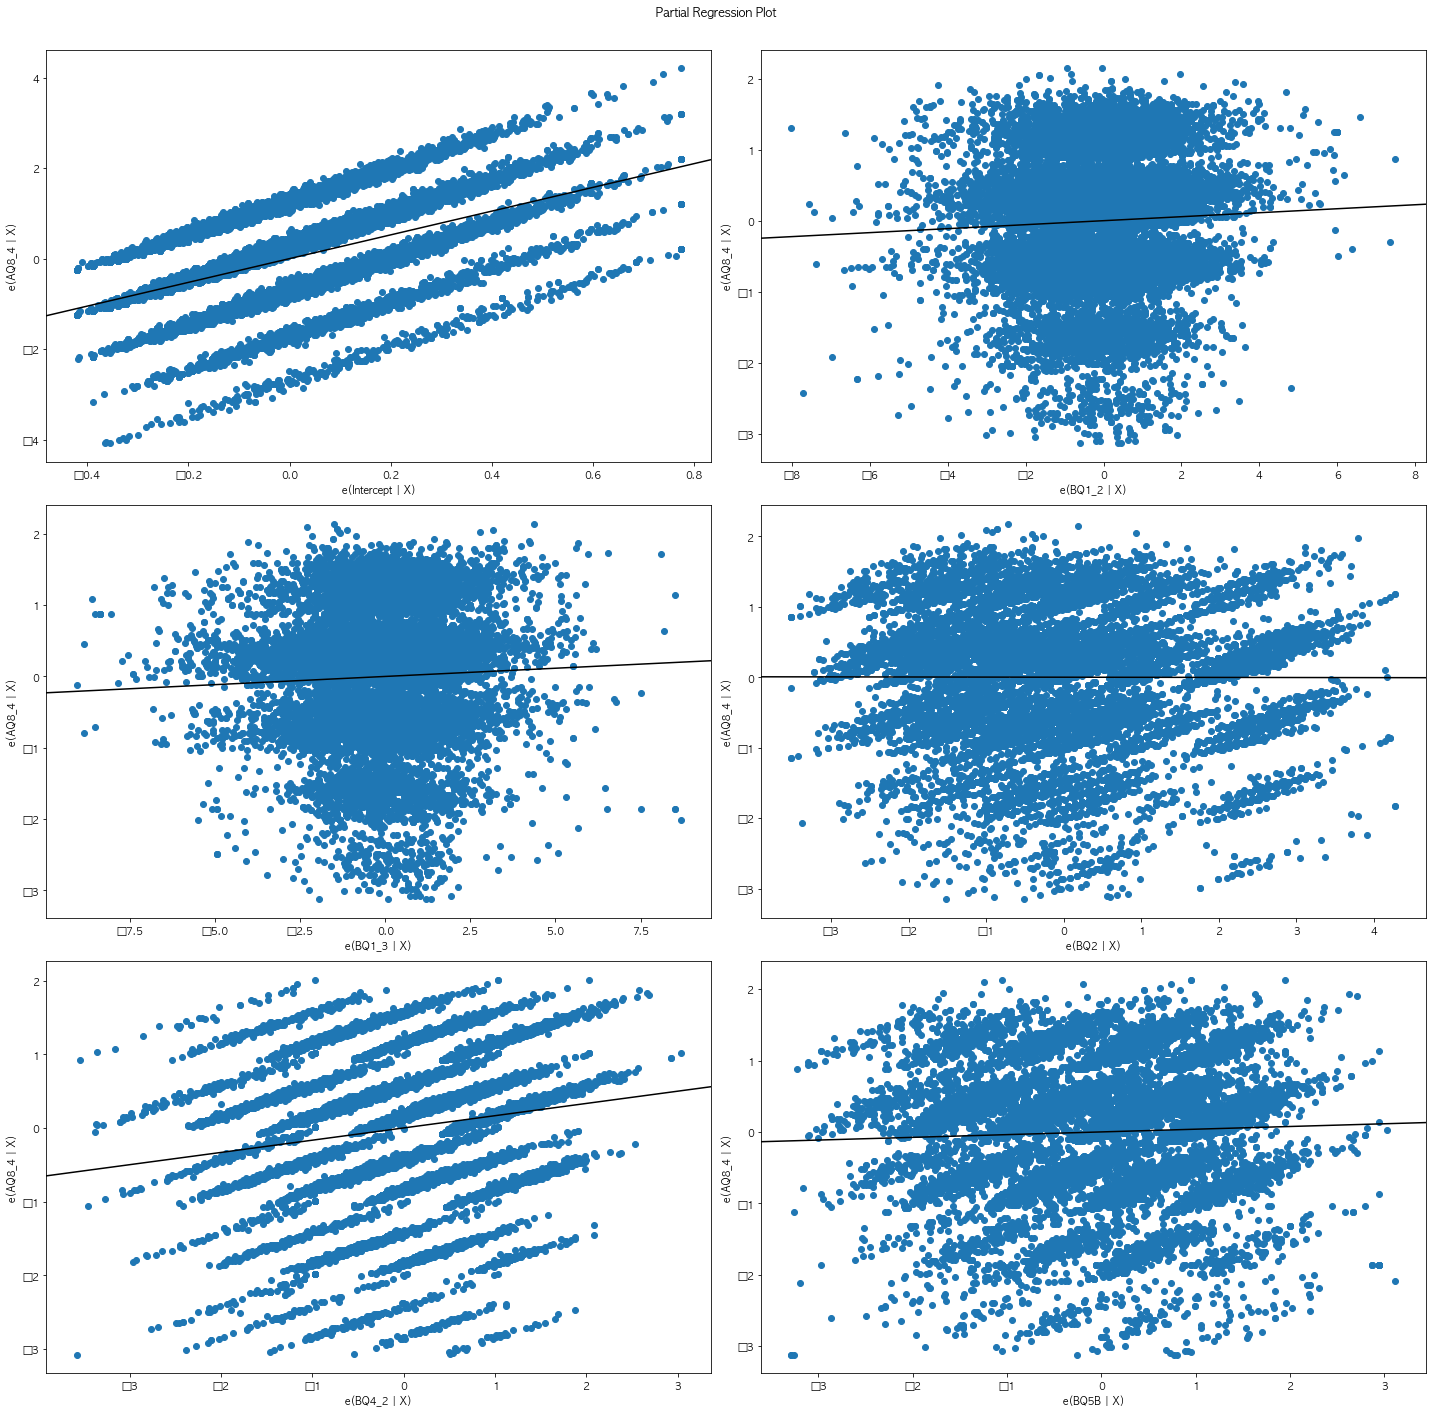

In [141]:
# 전체 변수의 영향력 시각화
fig = plt.figure(figsize = (20, 20))
sm.graphics.plot_partregress_grid(satisfaction_result, fig = fig)
plt.show()

In [128]:
X = survey_2021[['BQ1_2', 'BQ1_3', 'BQ2','BQ4_2', 'BQ5B']]
Y = survey_2021[['AQ8_4']]

In [129]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [130]:
# intercept 추가
X = sm.add_constant(X, has_constant='add')

In [131]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(28308, 6) (12133, 6) (28308, 1) (12133, 1)


In [132]:
# 회귀 모델 생성
lm = sm.OLS(Y_train, X_train)
lm_train = lm.fit()

In [133]:
lm_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  AQ8_4   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     394.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:43:41   Log-Likelihood:                -32243.
No. Observations:               28308   AIC:                         6.450e+04
Df Residuals:                   28302   BIC:                         6.455e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6295      0.026    101.695      0.000       2.579       2.680
BQ1_2          0.0244      0.004      6.312      0.000       0.017       0.032
BQ1_3          0.0264      0.003      7.560      0.000       0.020       0.033
BQ2           -0.0018      0.004     -0.483      0.629      -0.009       0.006
BQ4_2          0.1632      0.006     26.111      0.000       0.151       0.175
BQ5B           0.0394      0.006      7.046      0.000       0.028       0.050
==============================================================================
Omnibus:                     1058.689   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1266.574
Skew:                          -0.440   Prob(JB):                    9.27e-276
Kurtosis:                       3.549   Cond. No.                         65.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
Y_predict = lm_train.predict(X_test)
print(Y_predict)

12117    3.561144
29252    3.806716
7682     3.726303
38561    3.664445
26080    3.812159
           ...   
9164     3.998671
34863    3.374606
38854    3.420692
13963    3.835468
13744    3.561144
Length: 12133, dtype: float64


In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [136]:
# MSE(mean squared error), R-squared (모형 성능 확인)
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r_square = r2_score(Y_test, Y_predict)
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))
print('R-square : {0:.3f}'.format(r_square))

MAE : 0.600
MSE : 0.576
RMSE : 0.759
R-square : 0.071


자치구 데이터를 가지고 학습

In [151]:
satisfaction = 'AQ8_4 ~ BQ1_2 + BQ1_3 + BQ2 + BQ4_2 + BQ5B + 지하철_승객_수 + 합계최대지연시간_분 + 총화장실수'
satisfaction_result = ols(satisfaction, data = new4).fit()
satisfaction_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  AQ8_4   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     1.953
Date:                Tue, 07 Jun 2022   Prob (F-statistic):              0.121
Time:                        12:46:03   Log-Likelihood:                 50.962
No. Observations:                  25   AIC:                            -83.92
Df Residuals:                      16   BIC:                            -72.95
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3207      0.543      4.275      0.001       1.170       3.471
BQ1_2         -0.0290      0.093     -0.311      0.760      -0.226       0.169
BQ1_3          0.0247      0.083      0.297      0.771      -0.152       0.201
BQ2            0.2084      0.127      1.640      0.121      -0.061       0.478
BQ4_2          0.1354      0.160      0.846      0.410      -0.204       0.475
BQ5B           0.0456      0.100      0.456      0.654      -0.166       0.257
지하철_승객_수   -4.765e-08   4.31e-08     -1.105      0.285   -1.39e-07    4.37e-08
합계최대지연시간_분  6.645e-05   4.61e-05      1.441      0.169   -3.13e-05       0.000
총화장실수          0.0023      0.001      1.708      0.107      -0.001       0.005
==============================================================================
Omnibus:                        0.154   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.926   Jarque-Bera (JB):                0.324
Skew:                           0.147   Prob(JB):                        0.851
Kurtosis:                       2.526   Cond. No.                     4.35e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
# 선형 회귀분석 시각화
# 부분 회귀 계산을 위해 statsmodels.api 로드
import statsmodels.api as sm

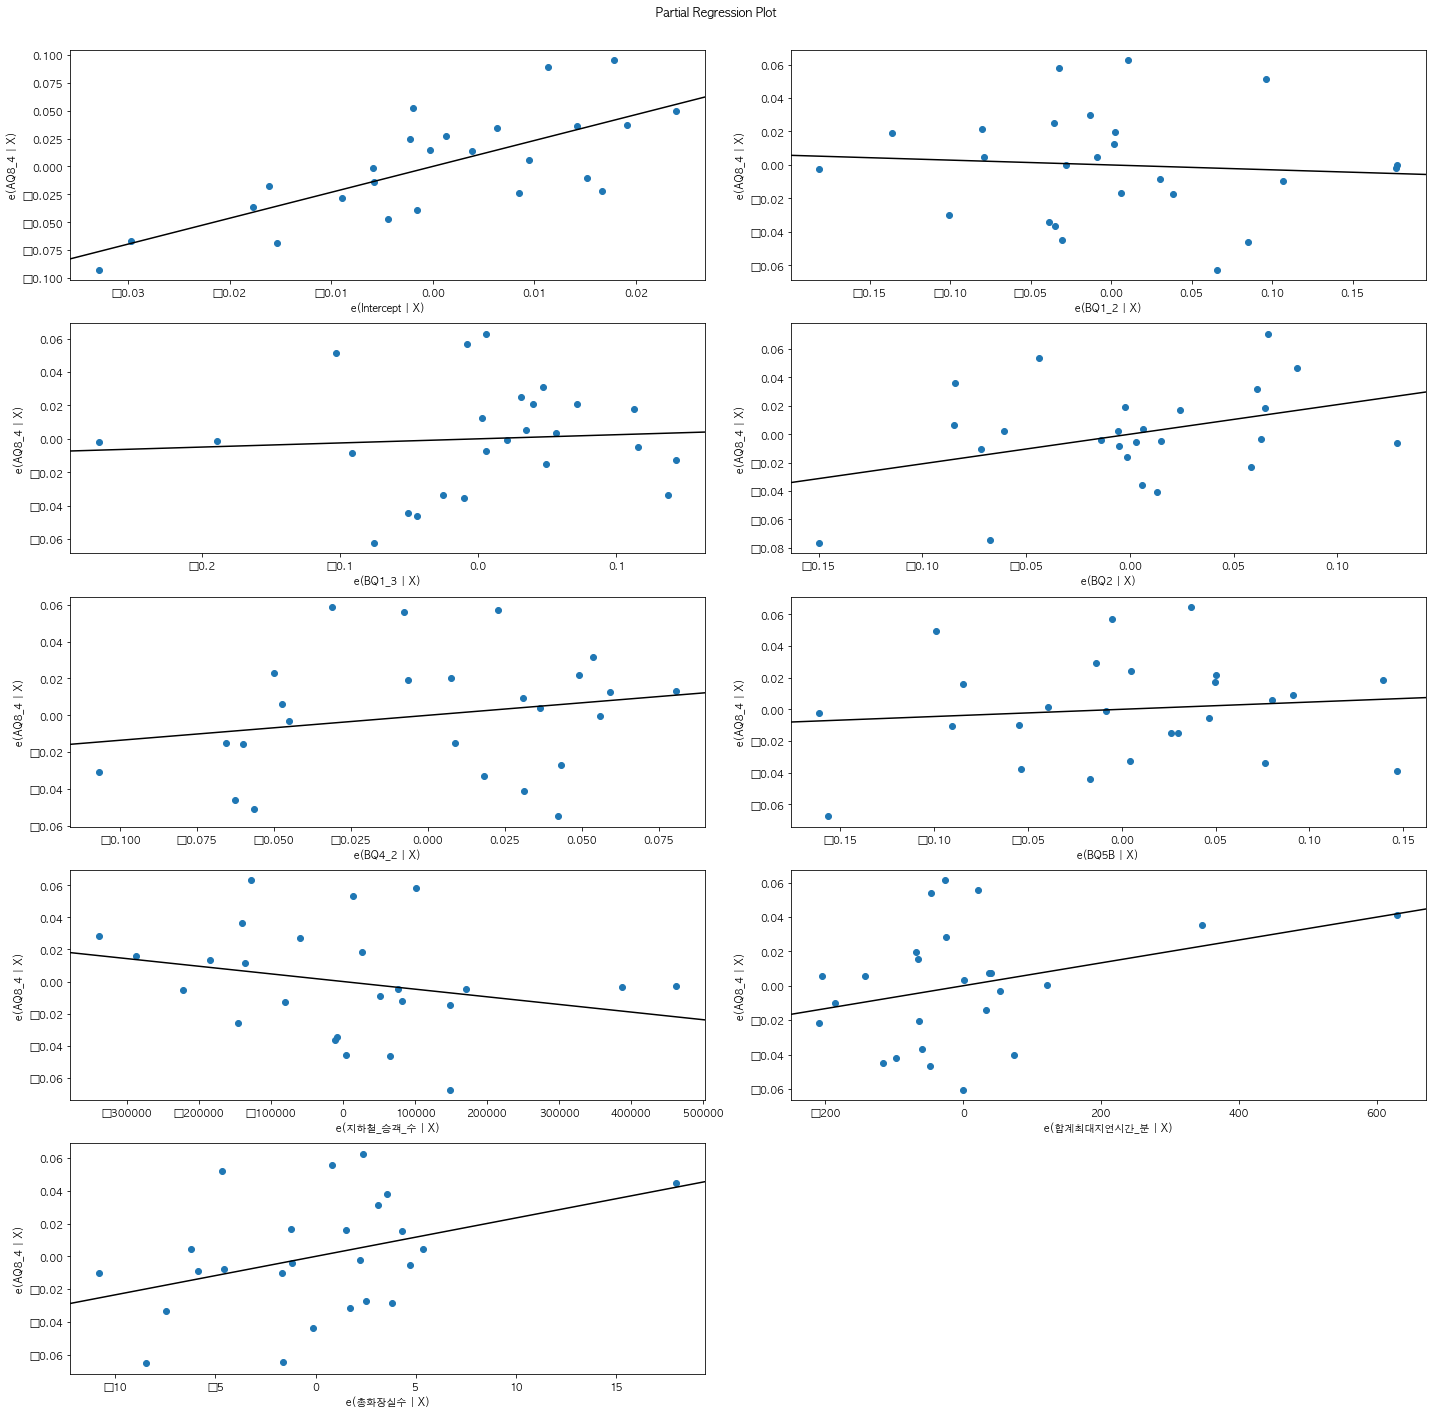

In [153]:
# 전체 변수의 영향력 시각화
fig = plt.figure(figsize = (20, 20))
sm.graphics.plot_partregress_grid(satisfaction_result, fig = fig)
plt.show()

In [154]:
from sklearn.linear_model import LinearRegression # 선형 회귀 분석
from sklearn.model_selection import train_test_split # 데이터셋 분리 작업
from sklearn.metrics import mean_squared_error, r2_score # MSE(mean squared erroe), R-square (모형 성능 확인)

In [155]:
Y = new4['AQ8_4']
X = new4.drop(['AQ8_4'], axis = 1, inplace = False)

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [157]:
lr = LinearRegression()

In [158]:
lr.fit(X_train, Y_train)

LinearRegression()

In [159]:
intercept = np.round(lr.intercept_,2)
intercept

2.88

In [160]:
coef = pd.Series(data = np.round(lr.coef_,2), index = X.columns)
coef

총화장실수         0.00
합계최대지연시간_분    0.00
지하철_승객_수     -0.00
BQ1_2         0.03
BQ1_3        -0.05
BQ2           0.10
BQ4_2         0.27
BQ5B         -0.13
dtype: float64

In [161]:
Y_predict = lr.predict(X_test)

In [162]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r_square = r2_score(Y_test, Y_predict)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R-square : {0:.3f}'.format(r_square))

MSE : 0.002, RMSE : 0.048
R-square : -0.204


In [163]:
# 만족도와 변수간 관계에 대한 산점도와 선형 회귀 그래프 (시각화)
import matplotlib.pyplot as plt
import seaborn as sns

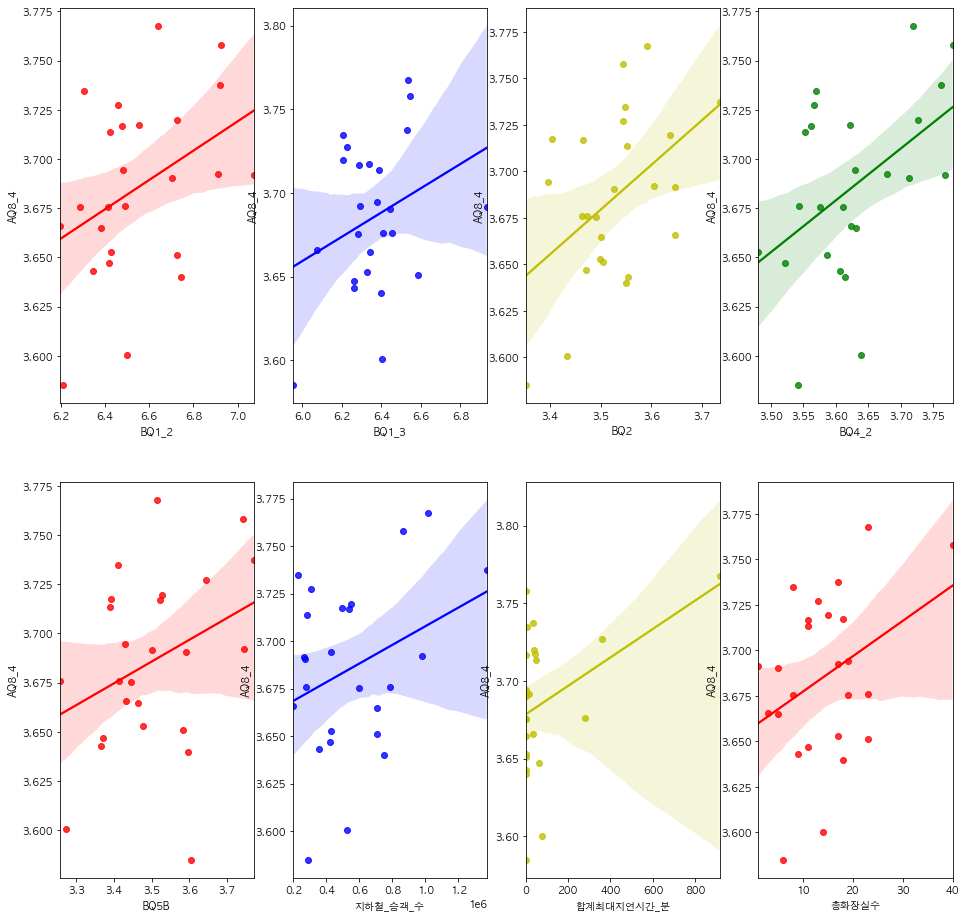

In [164]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 4, nrows = 2)
x_features = [ 'BQ1_2', 'BQ1_3', 'BQ2', 'BQ4_2', 'BQ5B', '지하철_승객_수', '합계최대지연시간_분', '총화장실수']
plot_color = ['r', 'b', 'y', 'g', 'r','b','y' ,'r']
for i, feature in enumerate(x_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = 'AQ8_4', data = new4, ax = axs[row][col], color = plot_color[i])

 > 회귀 분석 > 부정적인 변수들에 대한 : 개선방향 / 긍정적인 변수들 : 발전

In [165]:
# ml
Y = new4['AQ8_4']
X = new4.drop(['AQ8_4'], axis = 1, inplace = False)

In [166]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [167]:
# intercept 추가
X = sm.add_constant(X, has_constant='add')

In [168]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(17, 9) (8, 9) (17,) (8,)


In [169]:
# 회귀 모델 생성
lm = sm.OLS(Y_train, X_train)
lm_train = lm.fit()

In [170]:
lm_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  AQ8_4   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     2.334
Date:                Tue, 07 Jun 2022   Prob (F-statistic):              0.126
Time:                        12:46:41   Log-Likelihood:                 40.545
No. Observations:                  17   AIC:                            -63.09
Df Residuals:                       8   BIC:                            -55.59
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7407      0.532      5.156      0.001       1.515       3.966
총화장실수          0.0025      0.001      2.113      0.068      -0.000       0.005
합계최대지연시간_분 -8.792e-05      0.000     -0.179      0.863      -0.001       0.001
지하철_승객_수    1.929e-09   4.45e-08      0.043      0.966   -1.01e-07    1.05e-07
BQ1_2          0.0519      0.102      0.509      0.624      -0.183       0.287
BQ1_3         -0.0891      0.107     -0.836      0.428      -0.335       0.157
BQ2            0.1698      0.127      1.334      0.219      -0.124       0.463
BQ4_2          0.3859      0.159      2.419      0.042       0.018       0.754
BQ5B          -0.2465      0.150     -1.647      0.138      -0.592       0.099
==============================================================================
Omnibus:                        5.383   Durbin-Watson:                   2.608
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                2.734
Skew:                           0.784   Prob(JB):                        0.255
Kurtosis:                       4.184   Cond. No.                     4.36e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [171]:
Y_predict = lm_train.predict(X_test)
print(Y_predict)

7     3.701074
16    3.717893
2     3.602903
3     3.759035
1     3.662678
18    3.655880
5     3.667989
4     3.640864
dtype: float64


In [172]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [173]:
# MSE(mean squared error), R-squared (모형 성능 확인)
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r_square = r2_score(Y_test, Y_predict)
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))
print('R-square : {0:.3f}'.format(r_square))

MAE : 0.073
MSE : 0.007
RMSE : 0.082
R-square : -1.707


# Decision Tree

In [200]:
survey_2021['AQ8_4'].mean()

3.684181894611904

In [201]:
satisfaction=[]

# 0단계: 높음, 1단계: 낮음
for i in survey_2021['AQ8_4']:
    if i > survey_2021['AQ8_4'].mean():
        satisfaction.append(0)
    else:
        satisfaction.append(1)

In [202]:
survey_2021['만족도'] = satisfaction
survey_2021

,ID,GU,FAM1,FAM15,SQ0_2,SQ0_3,TE1,BQ1_1,BQ1_2,BQ1_3,...,JEW3,JEW4,JEW5,JEW6,JEW7,JEW8,wta2,wtb1,wtb2,만족도
0,1,110,2,2,1,1,1,7,6,7,...,2,6,1,110,1,3,0.906271,220.587656,1.079469,0
1,1,110,2,2,1,1,2,6,5,7,...,3,6,1,110,1,3,0.906271,179.406763,0.877946,0
2,2,110,1,1,1,2,1,7,6,7,...,3,6,2,110,1,2,0.464579,73.805978,0.361177,0
3,3,110,3,3,1,1,1,6,6,5,...,3,6,1,110,1,1,0.188537,52.521056,0.257017,0
4,3,110,3,3,1,1,2,7,6,7,...,2,6,1,110,1,4,0.188537,53.087902,0.259791,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40436,78145,680,1,1,1,3,1,7,6,8,...,3,4,2,680,5,1,2.344021,318.292334,1.557597,0
40437,78147,545,1,1,1,1,1,9,9,9,...,2,6,2,545,4,1,0.964221,179.046954,0.876185,0
40438,78148,590,1,1,5,3,1,7,6,7,...,4,3,2,590,4,1,2.024658,329.500478,1.612445,0
40439,78151,620,1,1,5,2,1,3,2,5,...,3,3,2,620,4,4,0.430676,60.688169,0.296984,0


In [203]:
X = survey_2021[['BQ1_2', 'BQ1_3','BQ4_2', 'BQ5B']]
Y = survey_2021[['AQ8_4']]

In [204]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(28308, 4) (12133, 4) (28308, 1) (12133, 1)


In [205]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 1234)
dt.fit(X_train, Y_train)

# 정확도 출력
print(dt.score(X_train, Y_train))
print(dt.score(X_test, Y_test))

0.5600536950685319
0.515948240336273


In [206]:
training_accuracy = []
test_accuracy = []

max_depth_settings = range(1, 25)

for k in max_depth_settings:
    # 모델 생성
    dt = DecisionTreeClassifier(max_depth = k, random_state = 0)
    dt.fit(X_train, Y_train)
    # 정확도 출력
    training_accuracy.append(dt.score(X_train, Y_train))
    test_accuracy.append(dt.score(X_test, Y_test))
    print('Max_depth : {}'.format(k))
    print('훈련 세트 정확도 : {:,.3f}'.format(dt.score(X_train, Y_train)))
    print('테스트 세트 정확도 : {:,.3f}'.format(dt.score(X_test, Y_test)))
    print('특성 중요도 : \n', dt.feature_importances_)
    print()

Max_depth : 1
훈련 세트 정확도 : 0.517
테스트 세트 정확도 : 0.515
특성 중요도 : 
 [0. 0. 1. 0.]

Max_depth : 2
훈련 세트 정확도 : 0.527
테스트 세트 정확도 : 0.526
특성 중요도 : 
 [0.16898999 0.         0.83101001 0.        ]

Max_depth : 3
훈련 세트 정확도 : 0.527
테스트 세트 정확도 : 0.526
특성 중요도 : 
 [0.18463912 0.05231898 0.7630419  0.        ]

Max_depth : 4
훈련 세트 정확도 : 0.532
테스트 세트 정확도 : 0.529
특성 중요도 : 
 [0.18217554 0.12490115 0.67414325 0.01878007]

Max_depth : 5
훈련 세트 정확도 : 0.532
테스트 세트 정확도 : 0.528
특성 중요도 : 
 [0.19402239 0.1392272  0.60585764 0.06089277]

Max_depth : 6
훈련 세트 정확도 : 0.537
테스트 세트 정확도 : 0.533
특성 중요도 : 
 [0.19927541 0.16771477 0.53348475 0.09952507]

Max_depth : 7
훈련 세트 정확도 : 0.539
테스트 세트 정확도 : 0.533
특성 중요도 : 
 [0.21592537 0.17284654 0.47868769 0.1325404 ]

Max_depth : 8
훈련 세트 정확도 : 0.541
테스트 세트 정확도 : 0.528
특성 중요도 : 
 [0.22802572 0.18167675 0.43310243 0.15719511]

Max_depth : 9
훈련 세트 정확도 : 0.545
테스트 세트 정확도 : 0.524
특성 중요도 : 
 [0.2386239  0.20553101 0.38939802 0.16644707]

Max_depth : 10
훈련 세트 정확도 : 0.548
테스트 세트 정확도 : 0.524

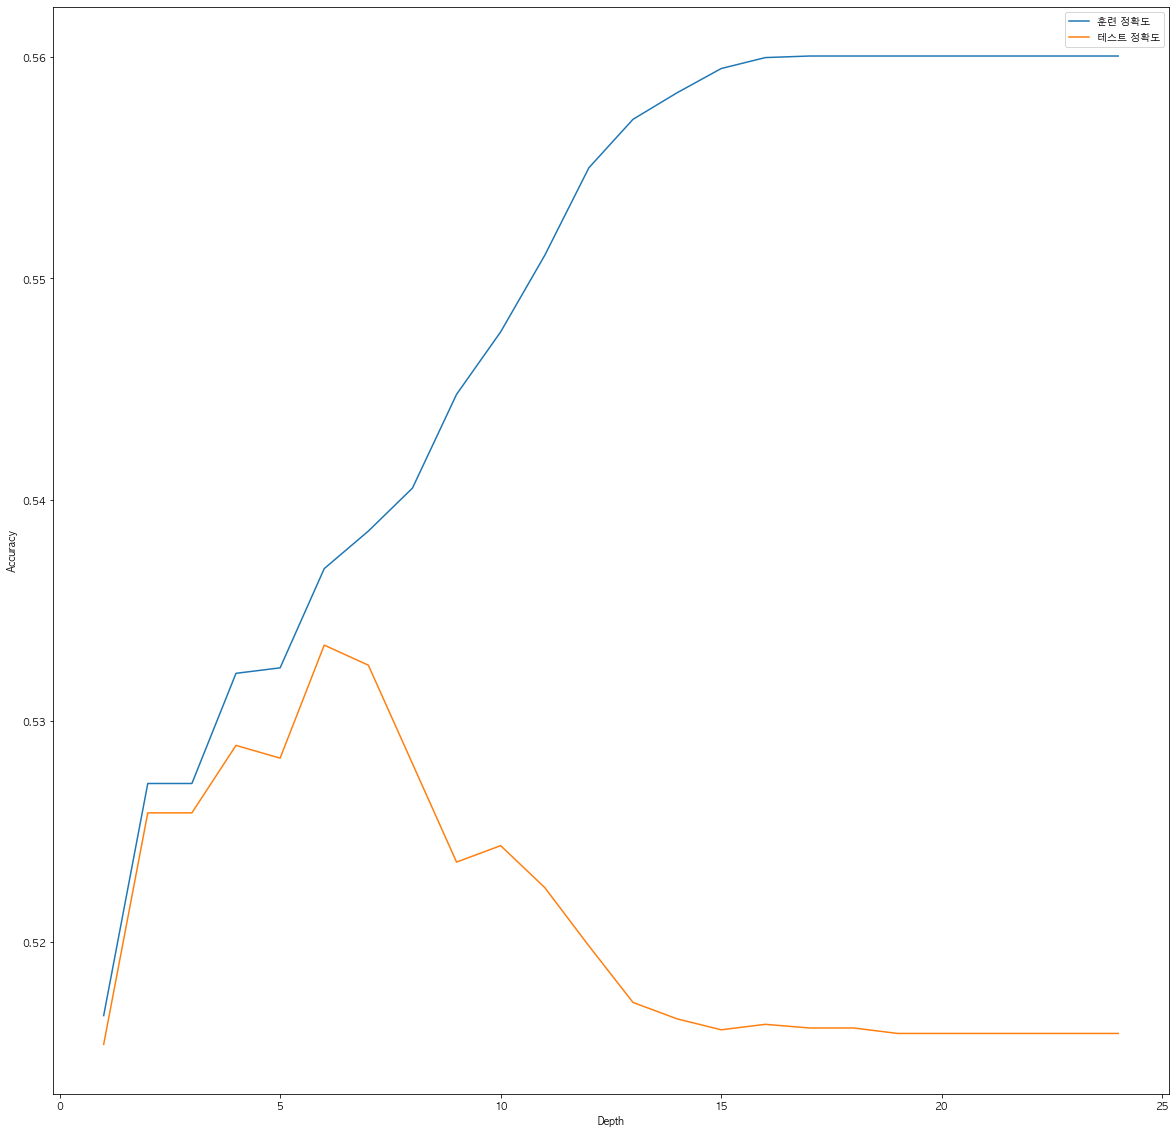

In [207]:
# 깊이 증가에 따른 예측 정확도 성능 비교
plt.figure(figsize = (20, 20))
plt.plot(max_depth_settings, training_accuracy, label = '훈련 정확도')
plt.plot(max_depth_settings, test_accuracy, label = '테스트 정확도')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()

In [208]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [209]:
# Decision Tree Prediction
Y_predict_dt = dt.predict(X_test)

In [210]:
# 오차 행렬(Confusion Matrix)를 통해 최적의 K에서의 예측 성능 확인
confusion_matrix(Y_test, Y_predict_dt)

array([[  15,    9,   33,   71,    5],
       [  10,    8,  121,  432,    3],
       [  20,   30,  808, 2772,   42],
       [  28,   44,  718, 5370,   93],
       [   2,    9,  144, 1288,   58]])

In [211]:
# Decision Tree Prediction
Y_predict_dt = dt.predict(X_test)

In [217]:
accuracy = accuracy_score(Y_test, Y_predict_dt)
precision = precision_score(Y_test, Y_predict_dt,average='micro')
recall = recall_score(Y_test, Y_predict_dt, average='micro')
f1 = f1_score(Y_test, Y_predict_dt, average='micro')
print('Accuracy : {0:.3f}'.format(accuracy))
print('Precision : {0:.3f}'.format(precision))
print('Recall : {0:.3f}'.format(recall))
print('F1 : {0:.3f}'.format(f1))

Accuracy : 0.516
Precision : 0.516
Recall : 0.516
F1 : 0.516
